In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [277]:
df = pd.read_csv('../../stacked_inner_pollution_data.csv')

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,5,6,7,8,10,11,14,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [319]:
df.head()

Date      Time                       Location  Carbon monoxide  \
0 2004-01-01  01:00:00       Ealing - Acton Town Hall          0.81494   
1 2004-01-01  01:00:00      Ealing - Ealing Town Hall              NaN   
2 2004-01-01  01:00:00  Ealing - Hanger Lane Gyratory              NaN   
3 2004-01-01  02:00:00       Ealing - Acton Town Hall          0.93136   
4 2004-01-01  02:00:00      Ealing - Ealing Town Hall              NaN   

   Nitric Oxide  Nitrogen dioxide  Non-volatile PM10  Non-volatile PM2.5  \
0           NaN          35.19000                NaN                 NaN   
1           NaN          18.55125                NaN                 NaN   
2           NaN          46.85625                NaN                 NaN   
3           NaN          17.59500                NaN                 NaN   
4           NaN          11.09250                NaN                 NaN   

   Oxides of Nitrogen     Ozone  PM1 Particulates  PM10 Particulate matter  \
0                 NaN       NaN               NaN                      NaN   
1                 NaN  39.91400               NaN                      NaN   
2                 NaN       NaN               NaN                      NaN   
3                 NaN       NaN               NaN                      NaN   
4                 NaN  54.48261               NaN                      NaN   

   PM10 particulate matter (Hourly measured)  PM2.5 Particulate matter  \
0                                       36.7                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                       48.2                       NaN   
4                                        NaN                       NaN   

   PM2.5 Particulate matter.1  PM2.5 particulate matter (Hourly measured)  \
0                         NaN                                        13.0   
1                         NaN                                         NaN   
2                         NaN                                         NaN   
3                         NaN                                        15.1   
4                         NaN                                         NaN   

   Sulphur dioxide  Volatile PM10  
0              NaN            NaN  
1         14.10277            NaN  
2              NaN            NaN  
3              NaN            NaN  
4         14.10277            NaN

## Units

PM10 Particulae Matter  --->   R ugm-3 (INDIC.GRAV)

Nitric Oxide  ---> R ugm-3

Nitrogen Dioxide ---> R ugm-3

Oxides of Nitrogen ---> R ugm-3

Sulpher Dioxide ---> R ugm-3

Non-volatile PM10 ---> R ugm-3 (INDIC.GRAV)

Non-volatile PM2.5 ---> R ugm-3

Ozone ---> R ugm-3

### Dropping units columns

In [279]:
unit_cols = [c for c in df.columns if "Status" in c]

In [280]:
df = df.drop(columns = unit_cols)

In [281]:
df['Date'] = pd.to_datetime(df['Date'])

In [282]:
cols = df.columns.drop(['Date', 'Time', 'Location'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [283]:
df.dtypes

Date                                          datetime64[ns]
Time                                                  object
Location                                              object
Carbon monoxide                                      float64
Nitric Oxide                                         float64
Nitrogen dioxide                                     float64
Non-volatile PM10                                    float64
Non-volatile PM2.5                                   float64
Oxides of Nitrogen                                   float64
Ozone                                                float64
PM1 Particulates                                     float64
PM10 Particulate matter                              float64
PM10 particulate matter (Hourly measured)            float64
PM2.5 Particulate matter                             float64
PM2.5 Particulate matter.1                           float64
PM2.5 particulate matter (Hourly measured)           float64
Sulphur dioxide         

In [284]:
df_hourly = df.copy()

In [285]:
df_daily = df_hourly.groupby(['Date', 'Location']).mean().reset_index()

In [286]:
df_daily.head()

Date                          Location  Carbon monoxide  Nitric Oxide  \
0 2004-01-01             Hounslow 2 - Cranford              NaN      4.130435   
1 2004-01-01   Hounslow 4 - Chiswick High Road              NaN     27.666667   
2 2004-01-01                Hounslow Brentford         0.558333     25.541667   
3 2004-01-01          Ealing - Acton Town Hall         0.834343           NaN   
4 2004-01-01         Ealing - Ealing Town Hall              NaN           NaN   

   Nitrogen dioxide  Non-volatile PM10  Non-volatile PM2.5  \
0         22.652174                NaN                 NaN   
1         47.875000                NaN                 NaN   
2         25.916667                NaN                 NaN   
3         38.106562                NaN                 NaN   
4         25.747031                NaN                 NaN   

   Oxides of Nitrogen     Ozone  PM1 Particulates  PM10 Particulate matter  \
0           28.565217       NaN               NaN                10.208333   
1           90.250000       NaN               NaN                21.416667   
2           65.083333       NaN               NaN                13.000000   
3                 NaN       NaN               NaN                      NaN   
4                 NaN  37.01192               NaN                      NaN   

   PM10 particulate matter (Hourly measured)  PM2.5 Particulate matter  \
0                                        NaN                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                  22.454167                       NaN   
4                                        NaN                       NaN   

   PM2.5 Particulate matter.1  PM2.5 particulate matter (Hourly measured)  \
0                         NaN                                         NaN   
1                         NaN                                         NaN   
2                         NaN                                         NaN   
3                         NaN                                    8.258333   
4                         NaN                                         NaN   

   Sulphur dioxide  Volatile PM10  
0         1.000000            NaN  
1         1.583333            NaN  
2              NaN            NaN  
3              NaN            NaN  
4        13.304500            NaN

In [287]:
df_daily.columns

Index(['Date', 'Location', 'Carbon monoxide', 'Nitric Oxide',
       'Nitrogen dioxide', 'Non-volatile PM10', 'Non-volatile PM2.5',
       'Oxides of Nitrogen', 'Ozone', 'PM1 Particulates',
       'PM10 Particulate matter', 'PM10 particulate matter (Hourly measured)',
       'PM2.5 Particulate matter', 'PM2.5 Particulate matter.1',
       'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
       'Volatile PM10'],
      dtype='object')

In [288]:
pollutants = ['Carbon monoxide', 'Nitric Oxide',
       'Nitrogen dioxide', 'Non-volatile PM10', 'Non-volatile PM2.5',
       'Oxides of Nitrogen', 'Ozone', 'PM1 Particulates',
       'PM10 Particulate matter', 'PM10 particulate matter (Hourly measured)',
       'PM2.5 Particulate matter', 'PM2.5 Particulate matter.1',
       'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
       'Volatile PM10']

In [12]:
# pollutants = ['Carbon monoxide', 'Ozone',
#        'PM10 particulate matter (Hourly measured)', 'PM2.5 Particulate matter',
#        'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
#        'Volatile PM10', ]

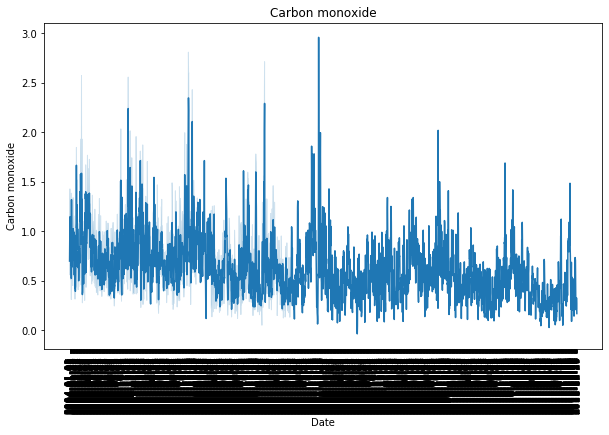

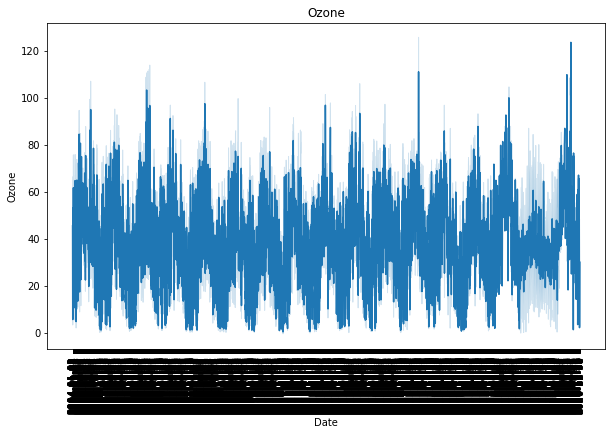

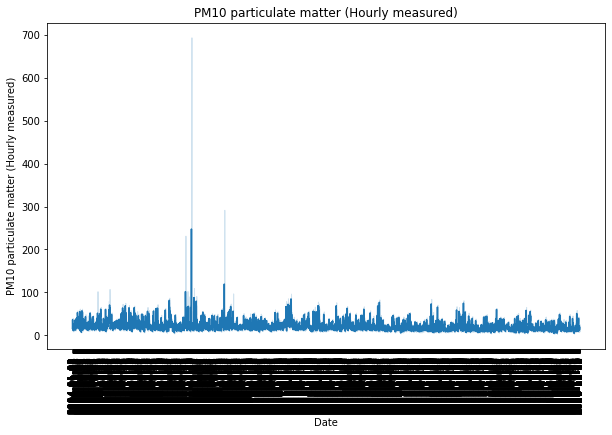

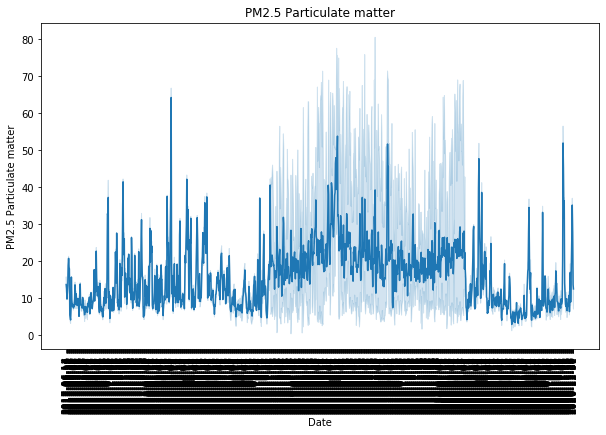

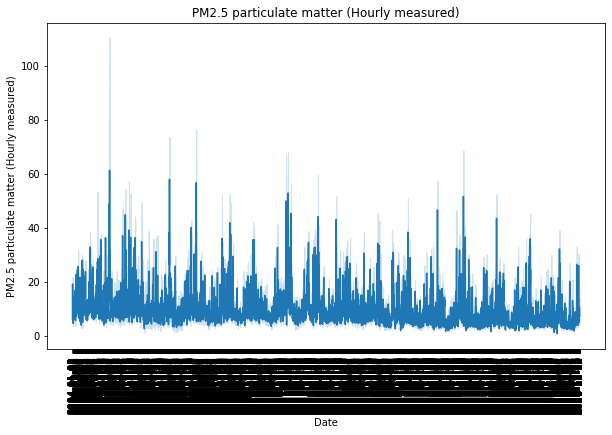

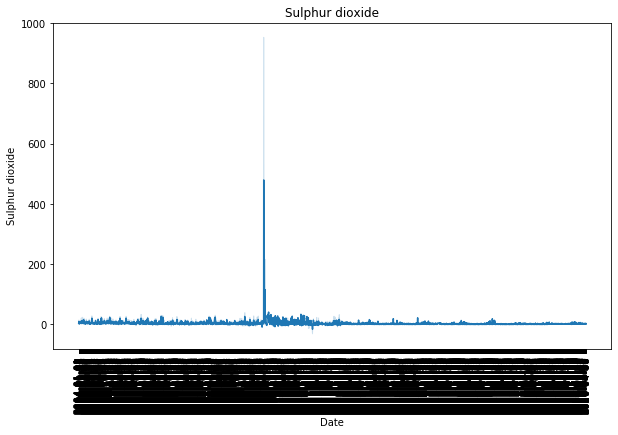

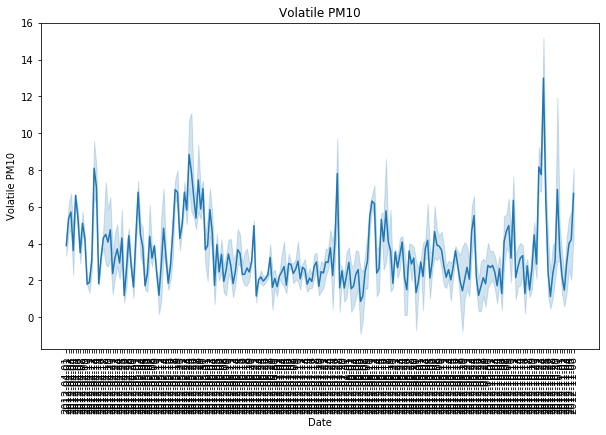

In [30]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_daily).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

In [289]:
df_monthly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='M')]).mean().reset_index()
df_quaterly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='Q')]).mean().reset_index()
df_yearly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='Y')]).mean().reset_index()
df_yearly.head()

Location       Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford 2004-12-31              NaN     19.366907   
1   Hounslow 2 - Cranford 2005-12-31              NaN     19.282252   
2   Hounslow 2 - Cranford 2006-12-31              NaN     16.322724   
3   Hounslow 2 - Cranford 2007-12-31              NaN     22.751626   
4   Hounslow 2 - Cranford 2008-12-31              NaN     19.463412   

   Nitrogen dioxide  Non-volatile PM10  Non-volatile PM2.5  \
0         35.637110                NaN                 NaN   
1         37.730687                NaN                 NaN   
2         37.439653                NaN                 NaN   
3         34.516199                NaN                 NaN   
4         36.025263                NaN                 NaN   

   Oxides of Nitrogen      Ozone  PM1 Particulates  PM10 Particulate matter  \
0           65.183649  31.628426               NaN                22.091612   
1           66.993132  34.426010               NaN                22.159977   
2           62.493307  41.626836               NaN                22.695308   
3           69.260681  31.764437               NaN                21.877800   
4           65.728967  36.527434               NaN                19.221030   

   PM10 particulate matter (Hourly measured)  PM2.5 Particulate matter  \
0                                        NaN                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                        NaN                       NaN   
4                                        NaN                       NaN   

   PM2.5 Particulate matter.1  PM2.5 particulate matter (Hourly measured)  \
0                         NaN                                         NaN   
1                         NaN                                         NaN   
2                         NaN                                         NaN   
3                         NaN                                         NaN   
4                         NaN                                         NaN   

   Sulphur dioxide  Volatile PM10  
0         3.611565            NaN  
1         3.959997            NaN  
2         3.018580            NaN  
3         2.886371            NaN  
4         3.046298            NaN

### Monthly pollution levels from 2004 - 2020

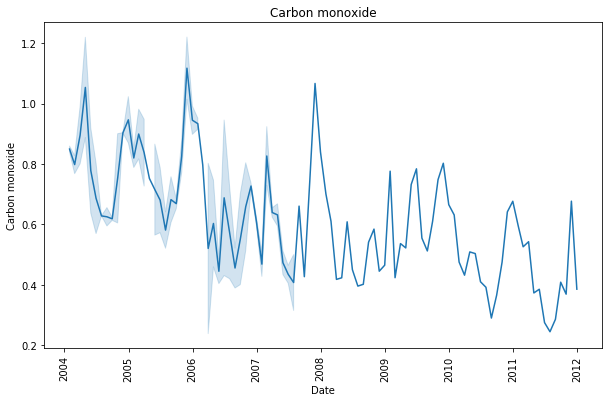

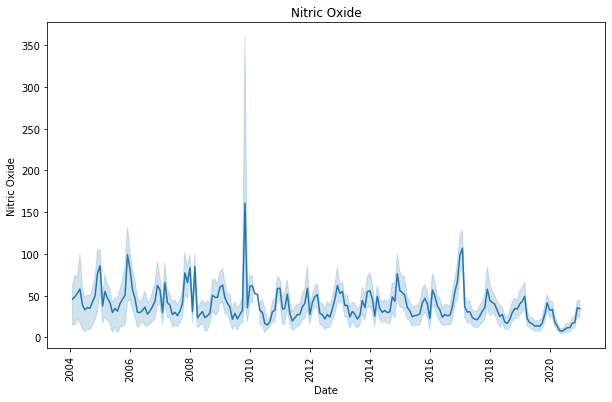

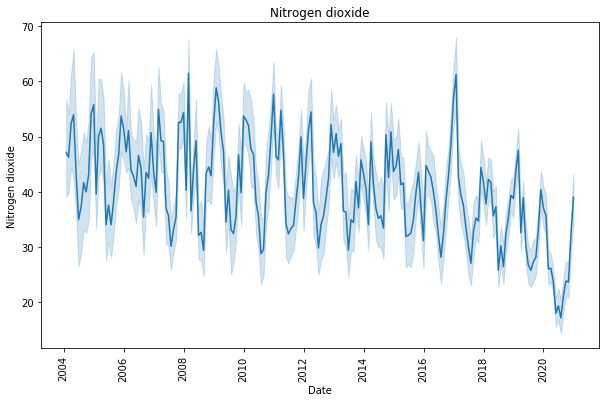

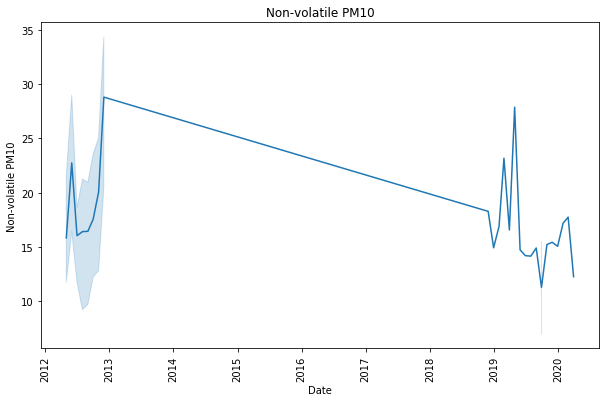

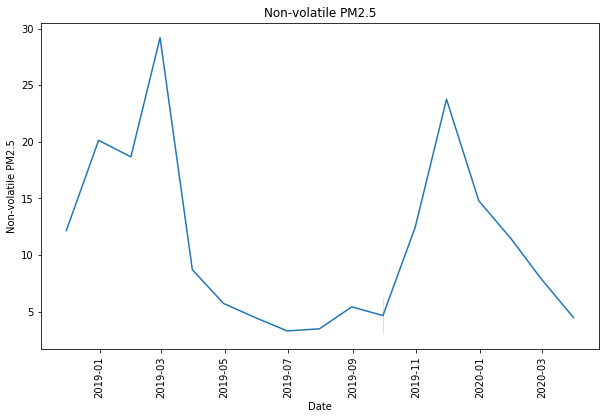

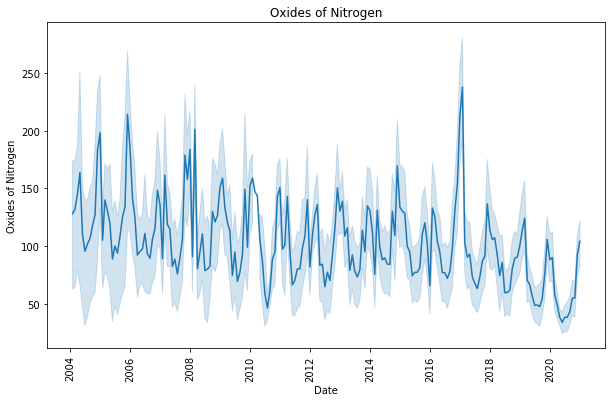

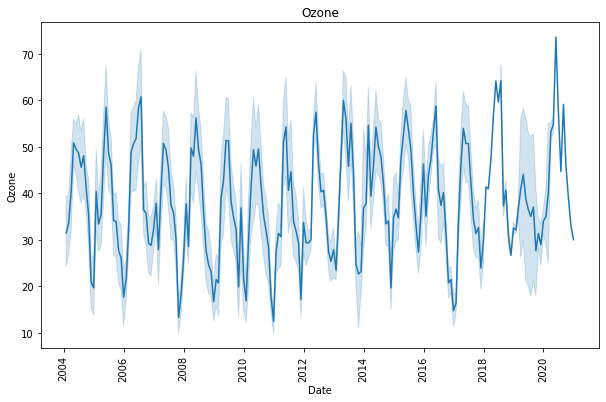

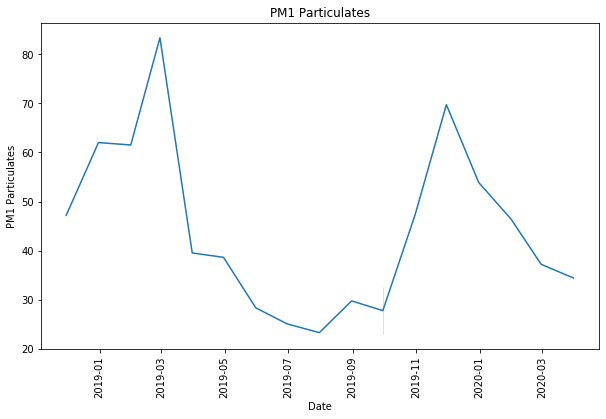

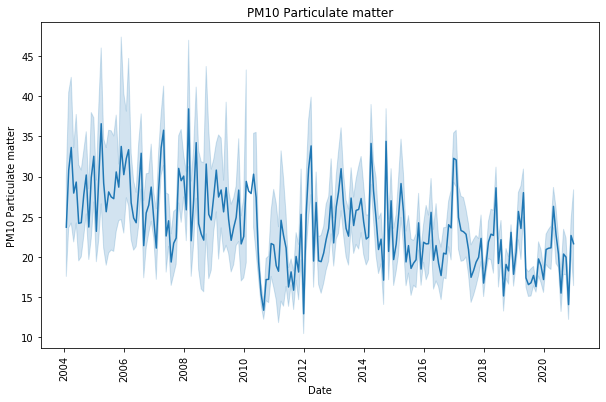

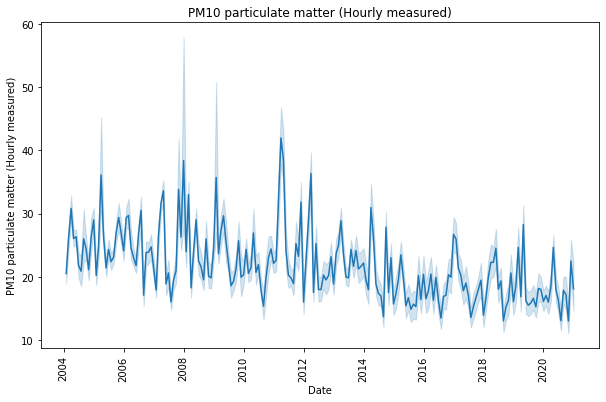

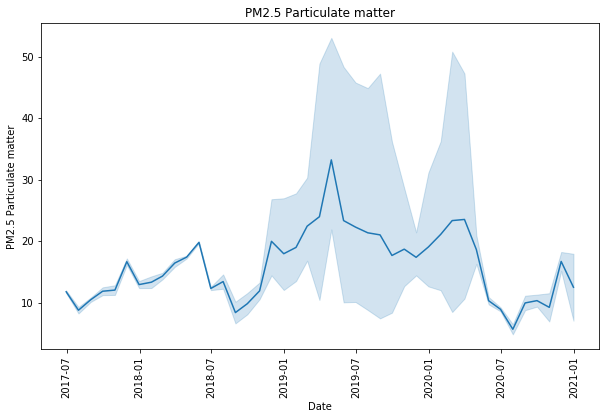

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


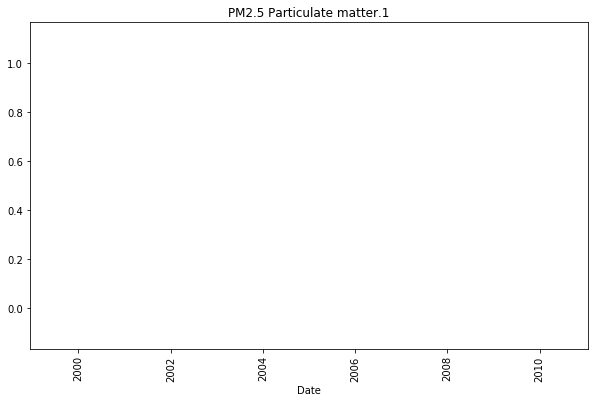

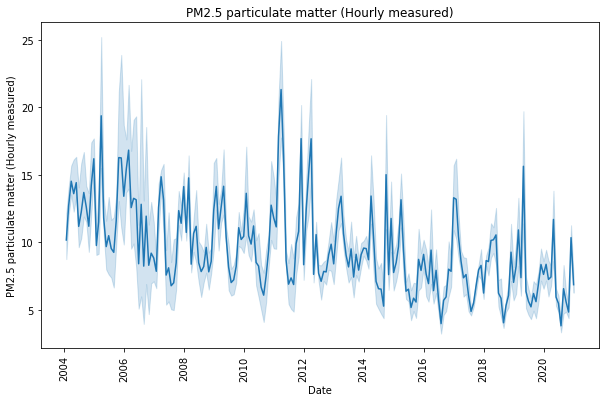

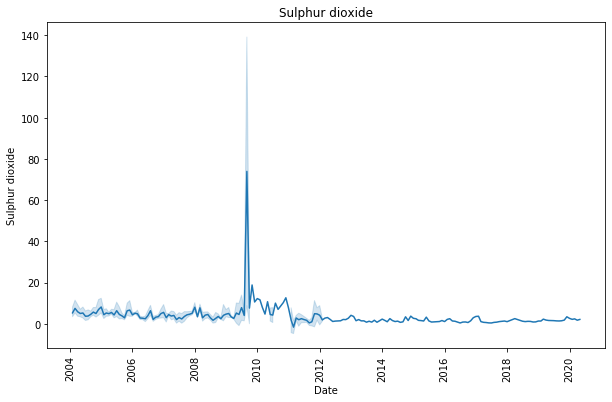

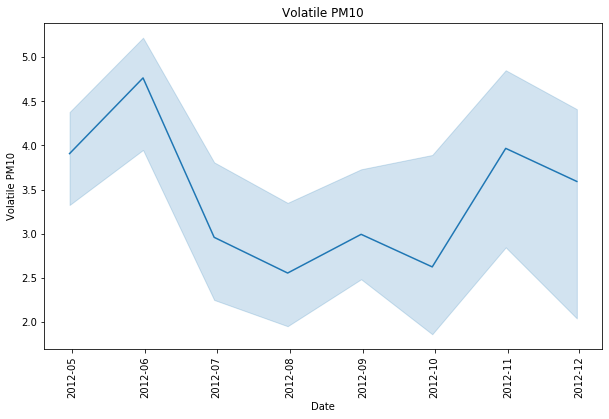

In [169]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_monthly).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

### Yearly pollution levels from 2004 - 2020

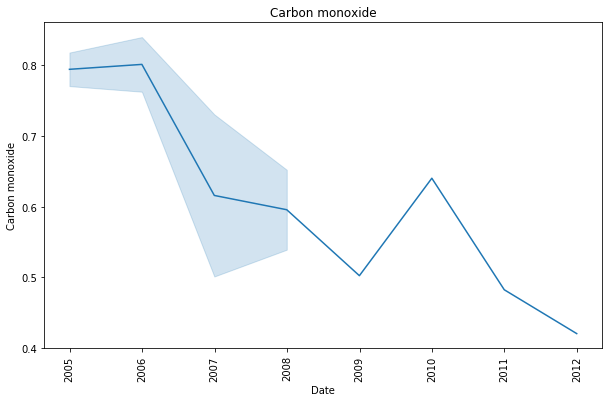

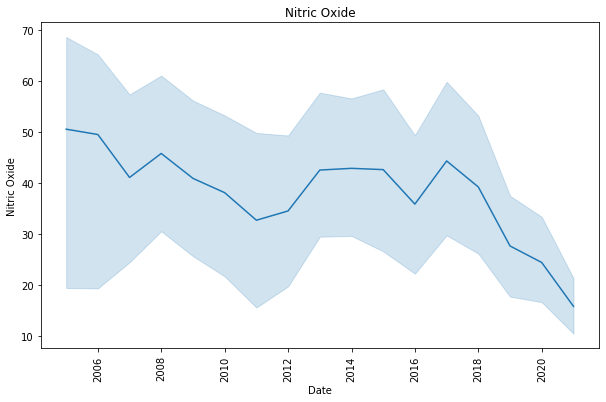

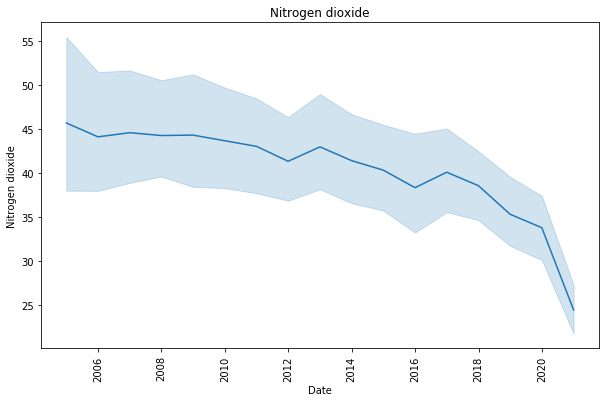

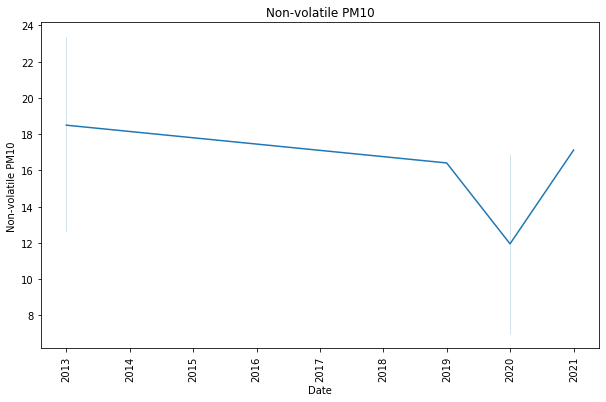

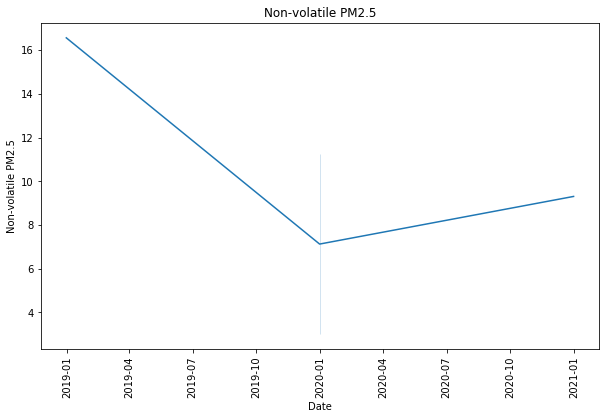

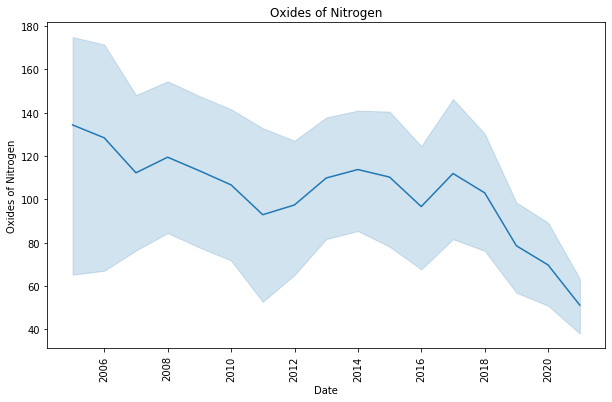

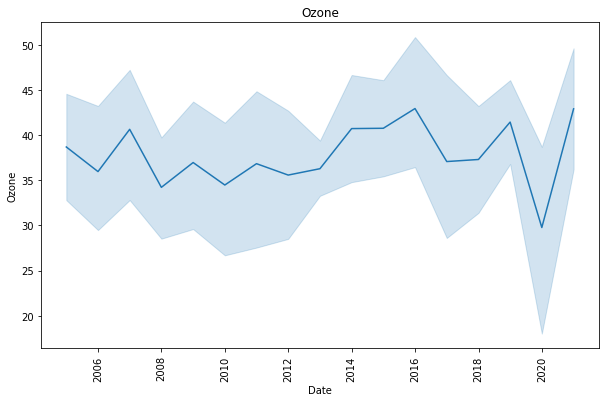

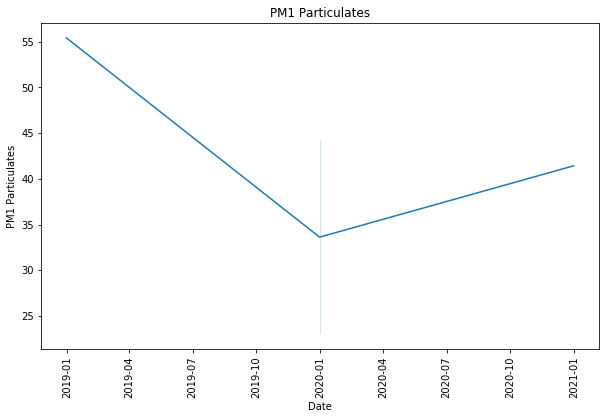

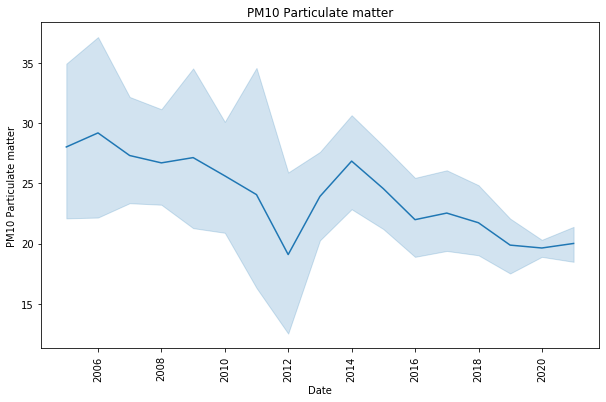

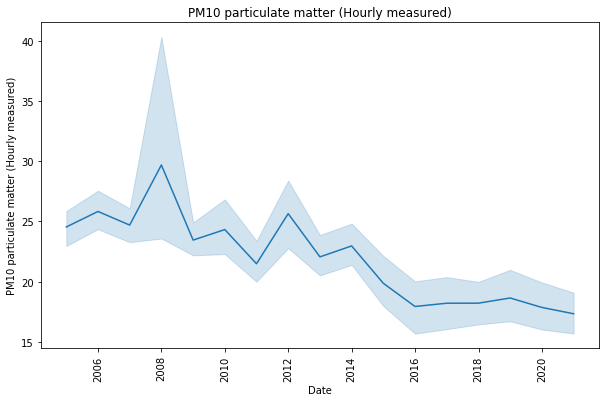

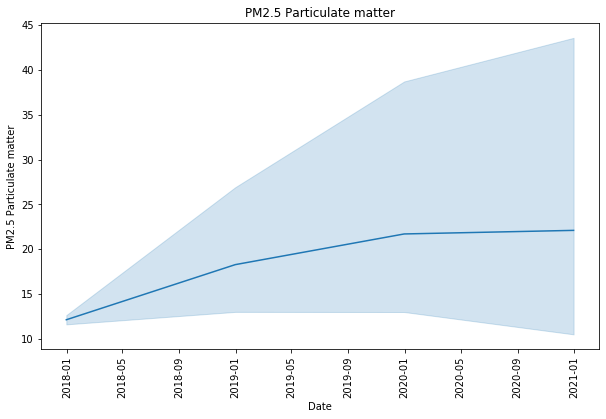

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


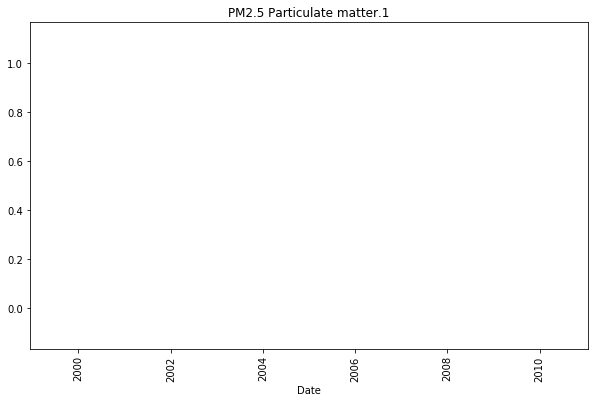

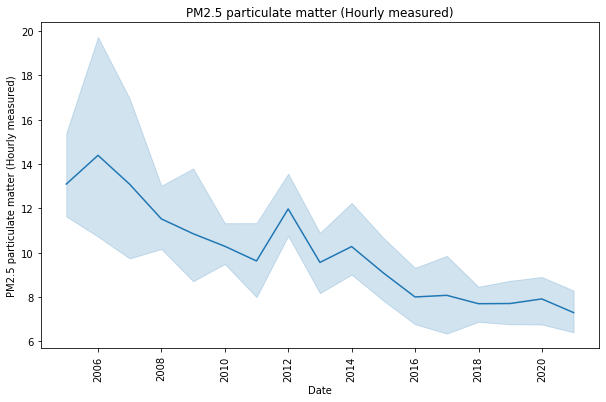

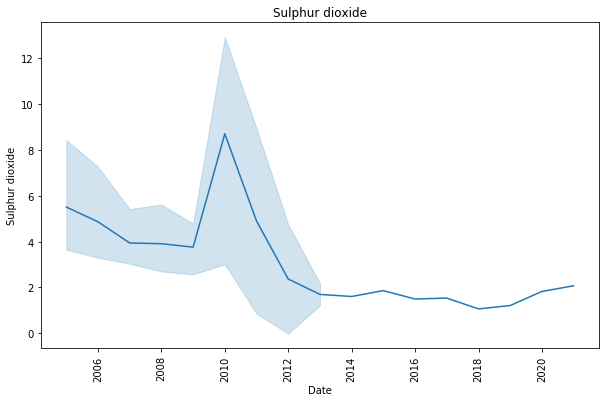

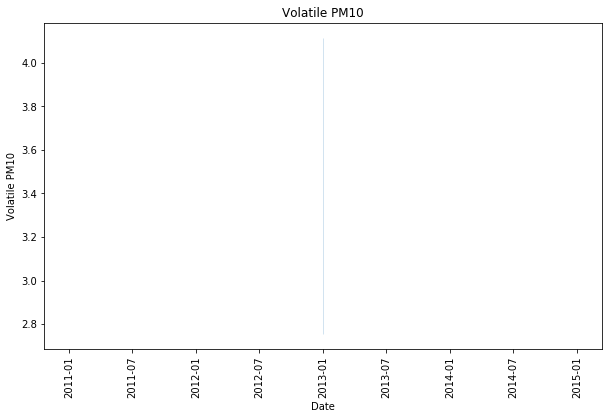

In [170]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_yearly).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

### Dropping Pullutants with limited data

In [290]:
df_monthly = df_monthly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)
df_quaterly = df_quaterly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)

In [291]:
df_yearly = df_yearly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)
df_yearly.head()

Location       Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford 2004-12-31              NaN     19.366907   
1   Hounslow 2 - Cranford 2005-12-31              NaN     19.282252   
2   Hounslow 2 - Cranford 2006-12-31              NaN     16.322724   
3   Hounslow 2 - Cranford 2007-12-31              NaN     22.751626   
4   Hounslow 2 - Cranford 2008-12-31              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide  
0                                         NaN         3.611565  
1                                         NaN         3.959997  
2                                         NaN         3.018580  
3                                         NaN         2.886371  
4                                         NaN         3.046298

In [390]:
# df_yearly.to_csv("inner_yearly_agg.csv")

### Melting Pollutants into a single column

In [176]:
boroughs = ['Heathrow', 'Ealing', 'Heathrow', 'Hillingdon', 'Richmond', 'Slough', 'Teddington']

In [326]:
poll_vars = df_monthly[['Location', 'Date']]
melted_daily = pd.melt(df_daily, id_vars=list(poll_vars.columns), value_vars = list(df_daily.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_monthly = pd.melt(df_monthly, id_vars=list(poll_vars.columns), value_vars = list(df_monthly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_quaterly = pd.melt(df_quaterly, id_vars=list(poll_vars.columns), value_vars = list(df_quaterly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_yearly = pd.melt(df_yearly, id_vars=list(poll_vars.columns), value_vars = list(df_yearly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_yearly.head()

Location       Date        Pollutant  \
0   Hounslow 2 - Cranford 2004-12-31  Carbon monoxide   
1   Hounslow 2 - Cranford 2005-12-31  Carbon monoxide   
2   Hounslow 2 - Cranford 2006-12-31  Carbon monoxide   
3   Hounslow 2 - Cranford 2007-12-31  Carbon monoxide   
4   Hounslow 2 - Cranford 2008-12-31  Carbon monoxide   

   Indicator Value (R µg/m3)  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN

In [321]:
melted_yearly.Location.unique()

array([' Hounslow 2 - Cranford', ' Hounslow 4 - Chiswick High Road',
       ' Hounslow Brentford', ' Hounslow Feltham',
       ' Hounslow Gunnersbury', ' Hounslow Hatton Cross',
       ' Hounslow Heston Road', 'Ealing - Acton Town Hall',
       'Ealing - Acton Town Hall (Partisol)',
       'Ealing - Acton Town Hall FDMS', 'Ealing - Acton Vale ',
       'Ealing - Court Way', 'Ealing - Ealing Town Hall',
       'Ealing - Greenford', 'Ealing - Hanger Lane Gyratory',
       'Ealing - Southall', 'Ealing - Southall FDMS',
       'Ealing - Southall Railway', 'Ealing - Western Avenue',
       'Heathrow Bath Road', 'Heathrow Green Gates', 'Heathrow LHR2',
       'Heathrow Oaks Road', 'Hillingdon 2 - Hillingdon Hospital',
       'Hillingdon Harmondsworth', 'Hillingdon Harmondsworth Osiris',
       'Hillingdon Hayes', 'Hillingdon Oxford Avenue',
       'Hillingdon Sipson', 'Hillingdon South Ruislip',
       'Hounslow Boston Manor Park',
       'National Physical Laboratory, Teddington',
       'R

In [ ]:
melted_yearly['Location']

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To cont

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


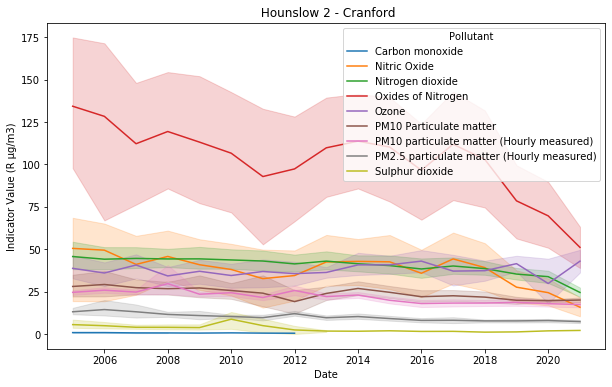

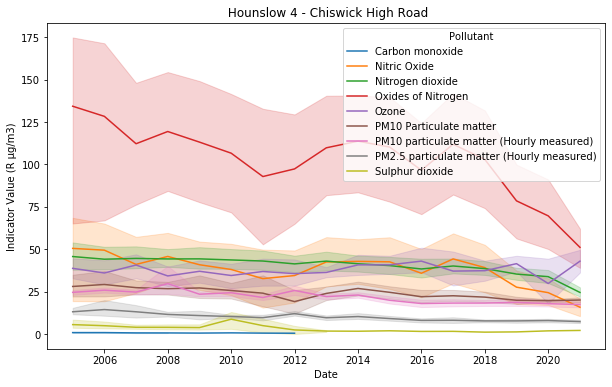

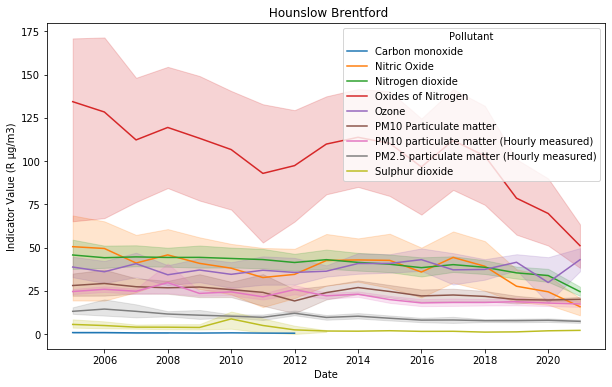

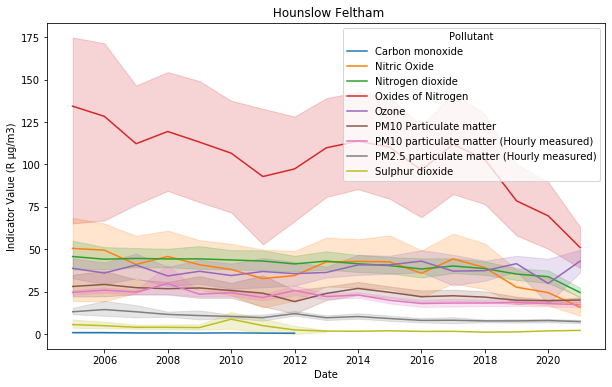

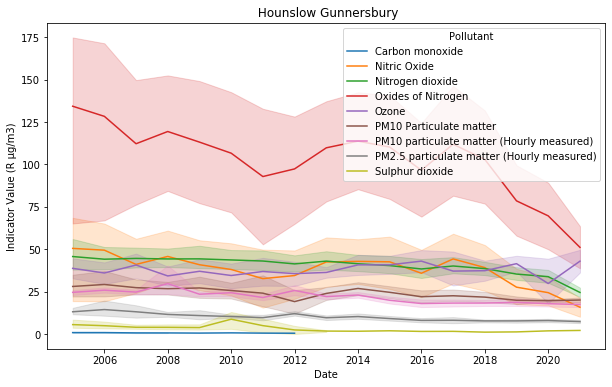

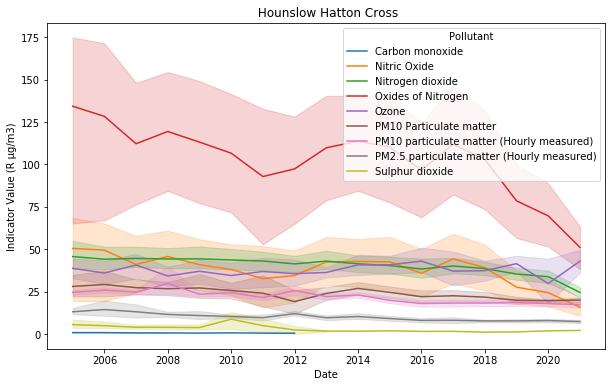

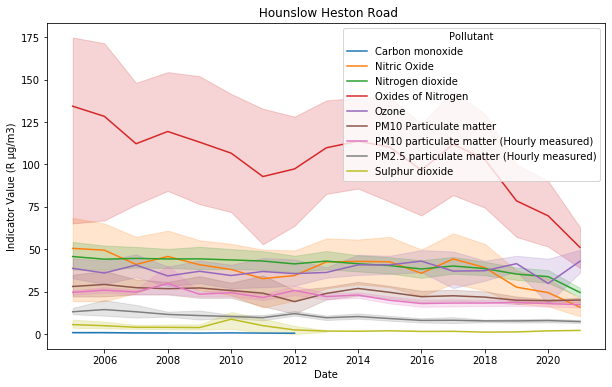

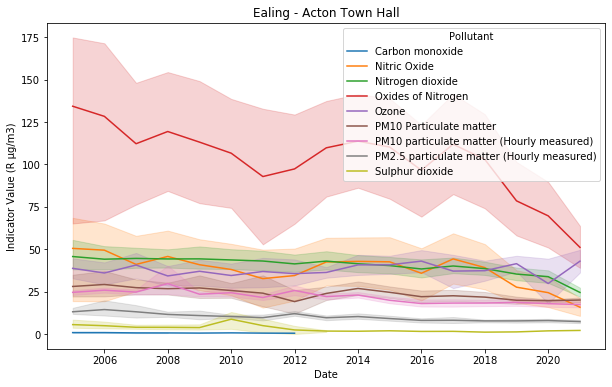

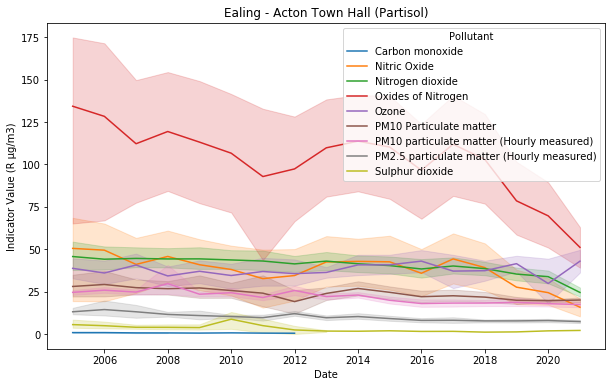

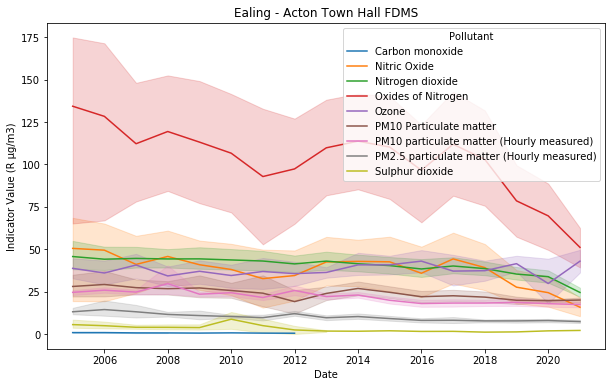

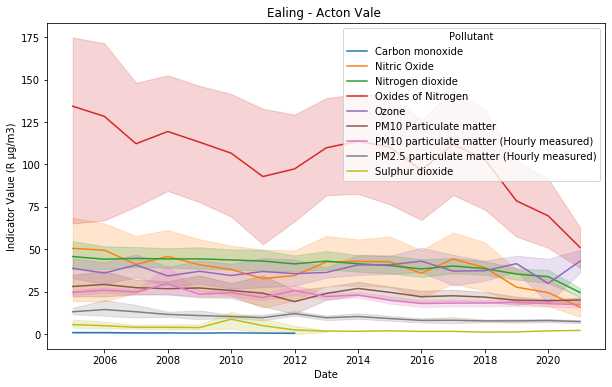

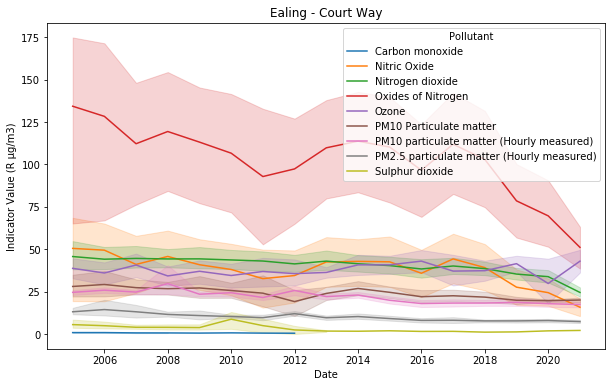

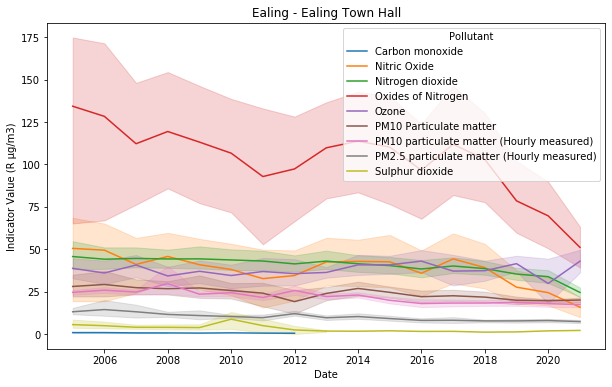

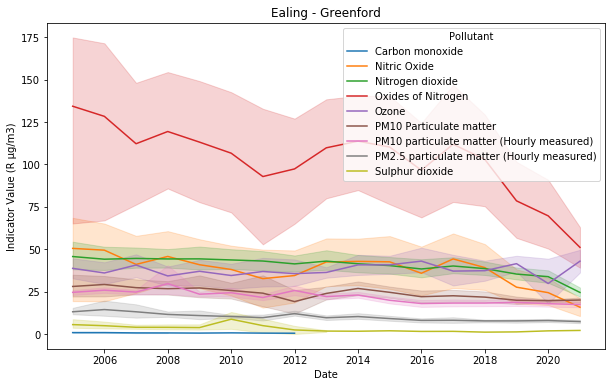

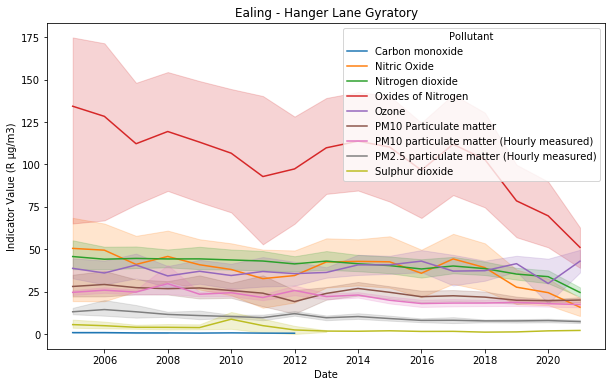

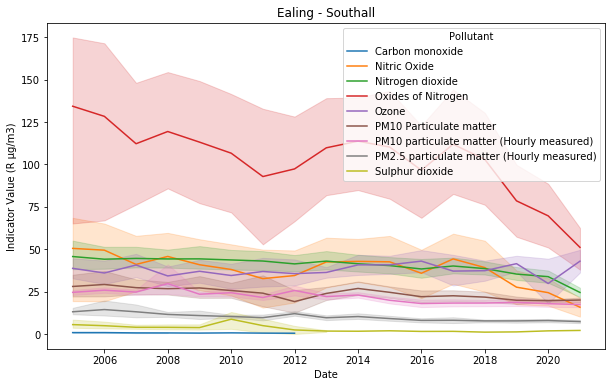

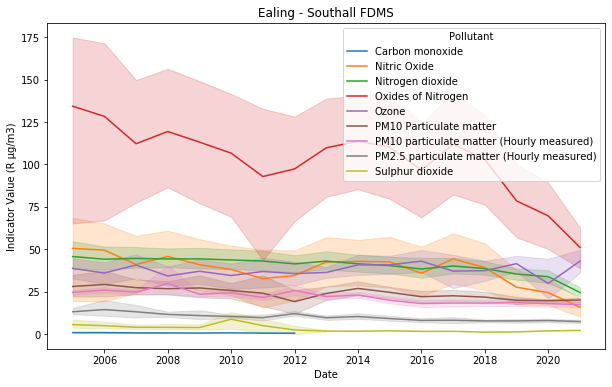

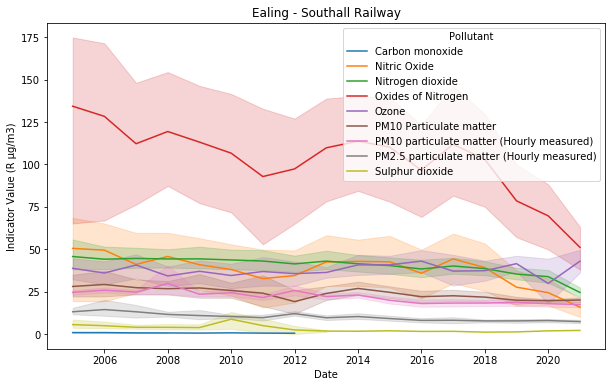

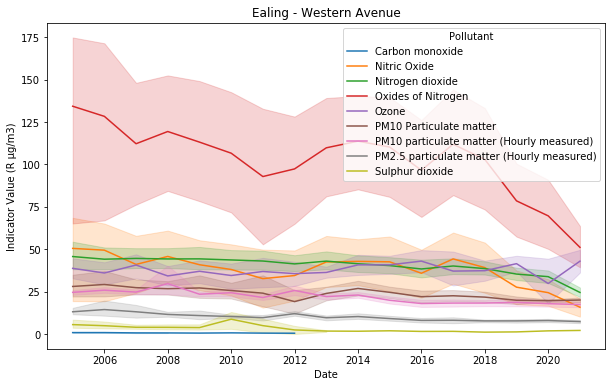

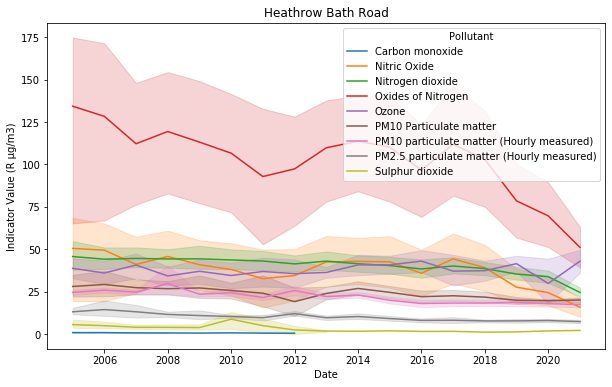

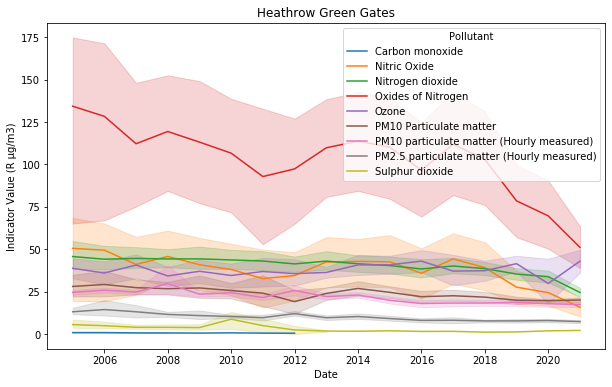

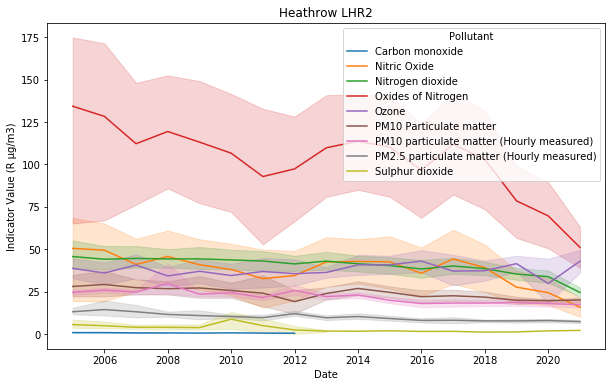

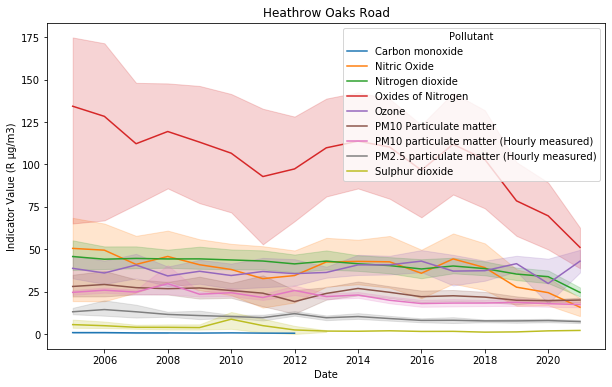

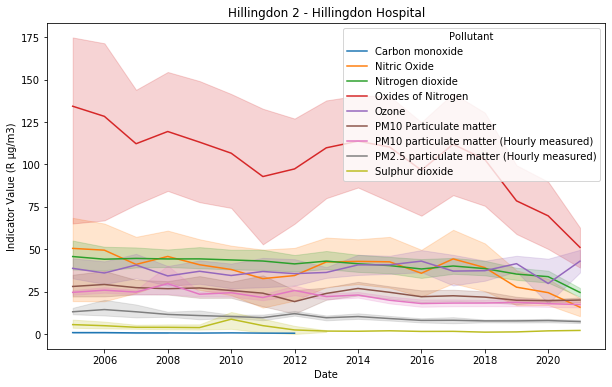

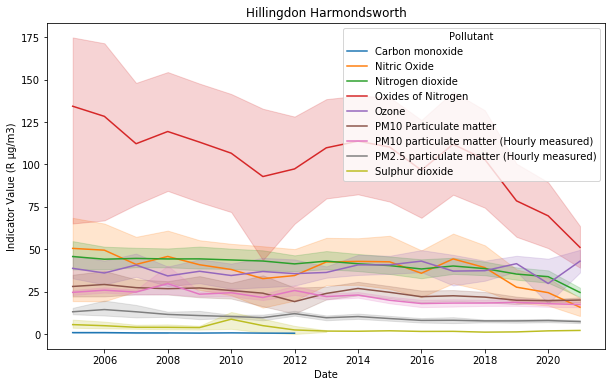

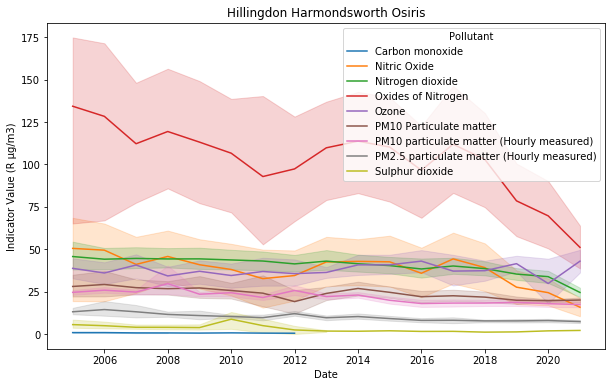

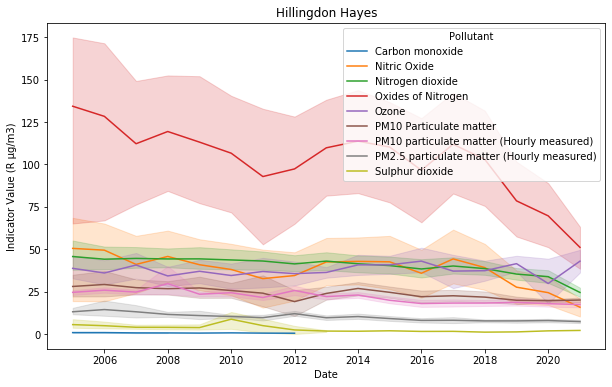

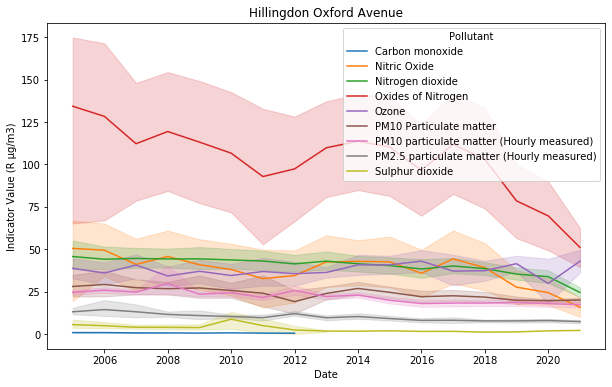

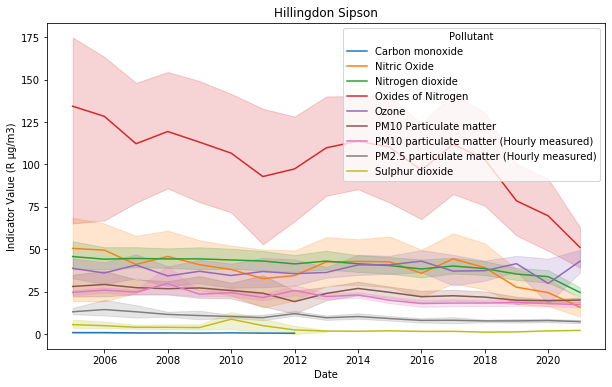

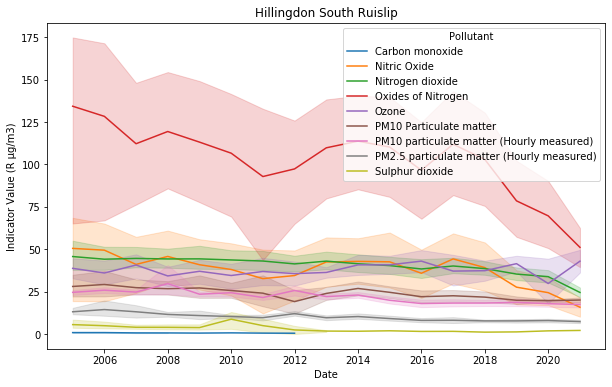

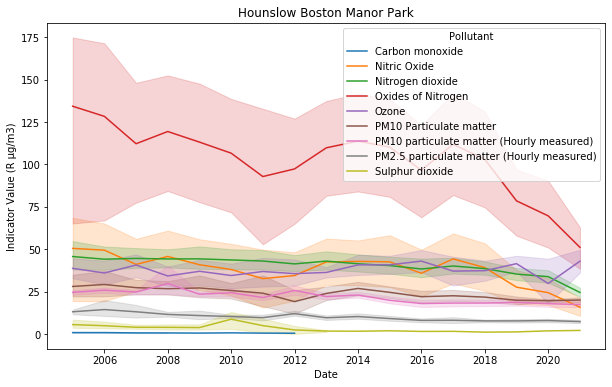

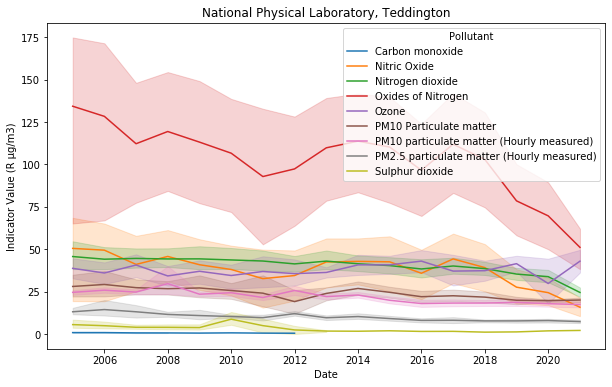

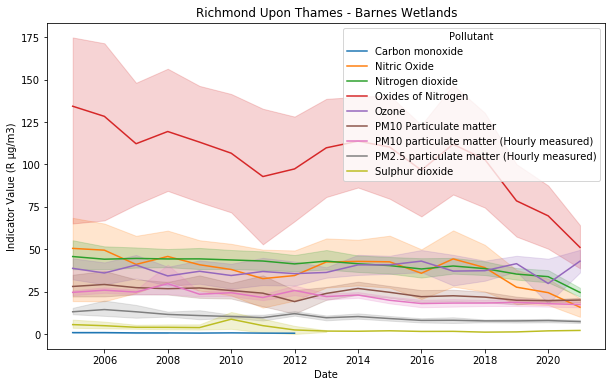

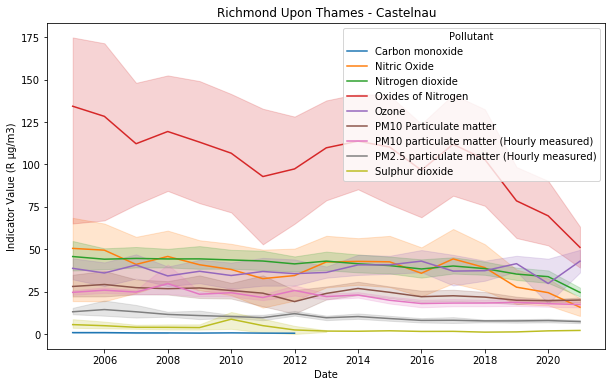

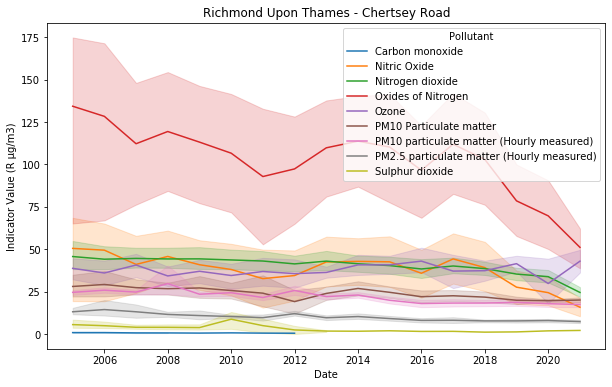

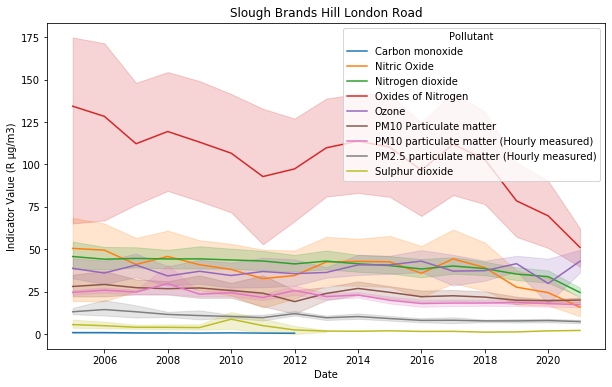

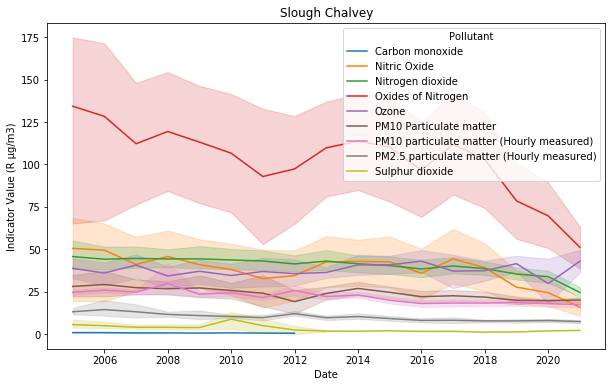

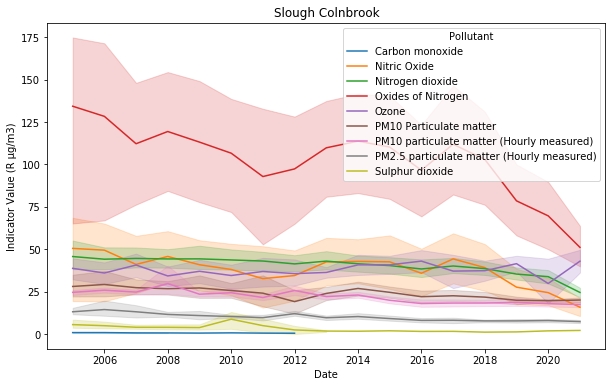

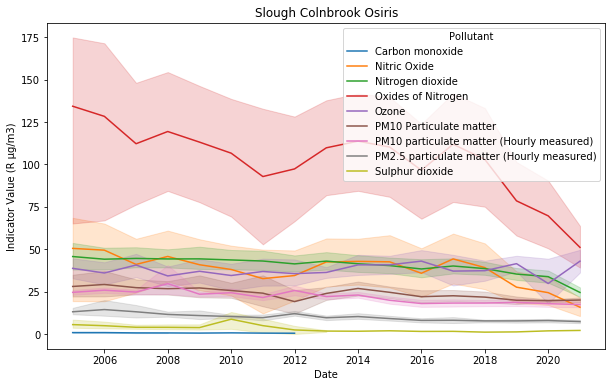

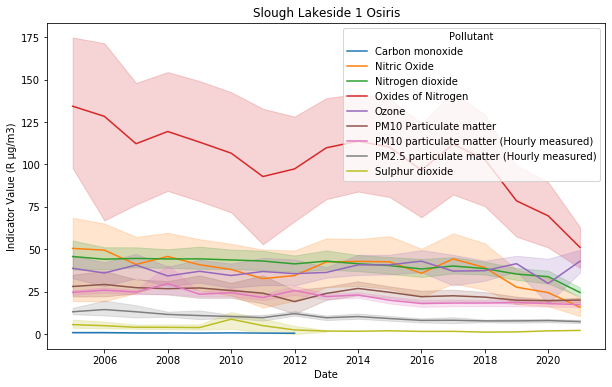

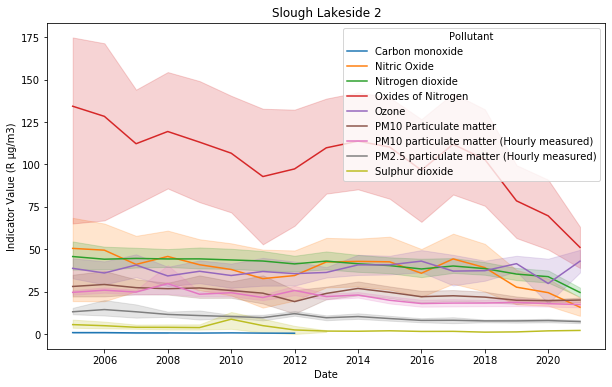

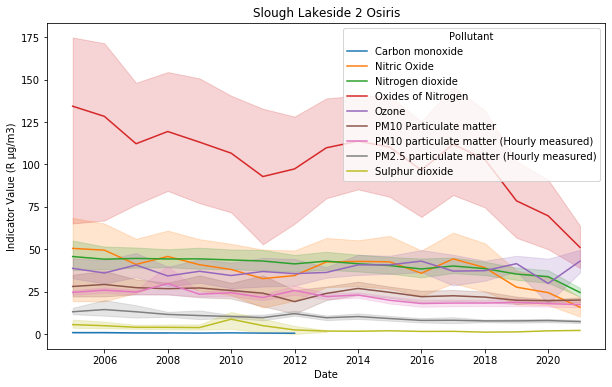

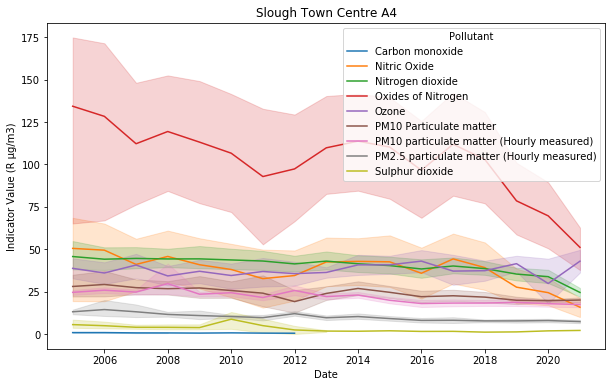

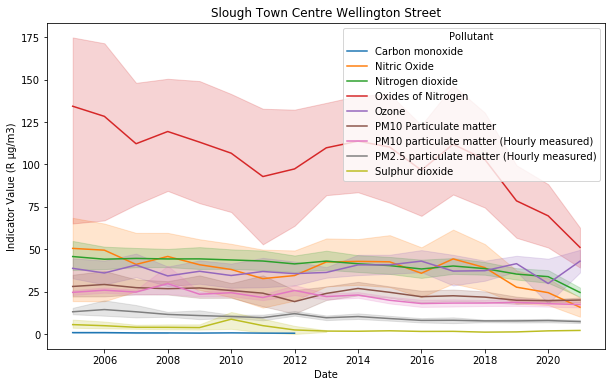

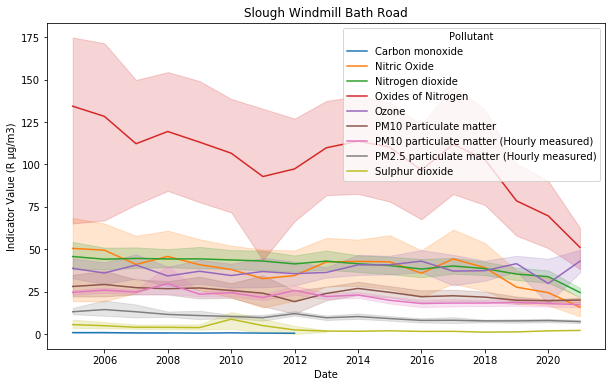

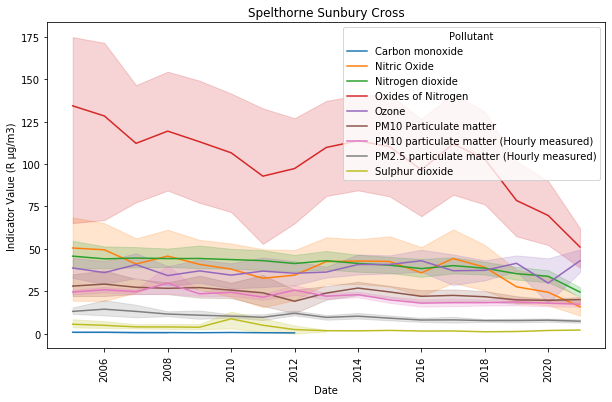

In [387]:
for l in melted_yearly['Location'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(y = 'Indicator Value (R µg/m3)' ,
                 x ='Date',
                 hue = 'Pollutant',
                 data = melted_yearly).set_title(l)
    plt.xticks(rotation=90)
    plt.show()

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


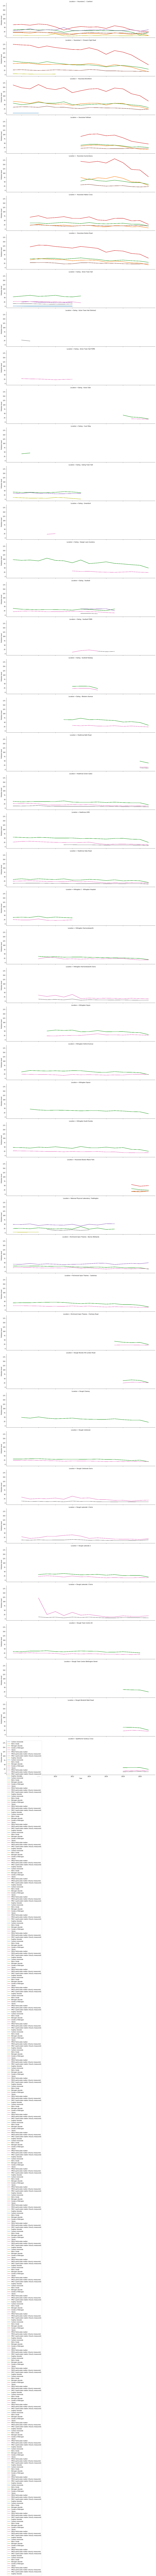

In [388]:
g = sns.FacetGrid(melted_yearly, col="Location", col_wrap=1, size=4, aspect=4)

for location in melted_yearly.Location.unique():
        g.map_dataframe(sns.lineplot, x = 'Date', y = 'Indicator Value (R µg/m3)', hue = 'Pollutant')
        plt.legend()

            
g.set_axis_labels("Year", "Pollution level") 
plt.show()

### Mapping CCGs

In [362]:
len(list(melted_yearly.Location.unique()))

46

In [204]:
CCG = {'Hillingdon':['Hillingdon 2 - Hillingdon Hospital',
                     'Hillingdon Harmondsworth',
                     'Hillingdon Harmondsworth Osiris',
                     'Hillingdon Hayes',
                     'Hillingdon Oxford Avenue',
                     'Hillingdon Sipson',
                     'Hillingdon South Ruislip', 
                     'Heathrow LHR2', 
                     'Heathrow Bath Road', 
                     'Heathrow Green Gates'],
       'East Berkshire':['Slough Brands Hill London Road',
                         'Slough Chalvey', 
                         'Slough Colnbrook',
                         'Slough Colnbrook Osiris',
                         'Slough Lakeside 1 Osiris',
                         'Slough Lakeside 2',
                         'Slough Lakeside 2 Osiris',
                         'Slough Town Centre A4',
                         'Slough Town Centre Wellington Street',
                         'Slough Windmill Bath Road'],
       'Hounslow': [' Hounslow 2 - Cranford',
                    ' Hounslow 4 - Chiswick High Road',
                    ' Hounslow Brentford',
                    ' Hounslow Feltham',
                    ' Hounslow Gunnersbury',
                    ' Hounslow Hatton Cross',
                    ' Hounslow Heston Road',
                    'Hounslow Boston Manor Park'],
       'Ealing':['Ealing - Acton Town Hall',
                 'Ealing - Acton Town Hall (Partisol)',
                 'Ealing - Acton Town Hall FDMS',
                 'Ealing - Acton Vale ',
                 'Ealing - Court Way',
                 'Ealing - Ealing Town Hall',
                 'Ealing - Greenford',
                 'Ealing - Hanger Lane Gyratory',
                 'Ealing - Southall',
                 'Ealing - Southall FDMS',
                 'Ealing - Southall Railway',
                 'Ealing - Western Avenue'],
       'Surrey Heartlands': ['Spelthorne Sunbury Cross','Heathrow Oaks Road'],
       'South West London': ['Richmond Upon Thames - Barnes Wetlands',
                             'Richmond Upon Thames - Castelnau',
                             'Richmond Upon Thames - Chertsey Road',
                             'National Physical Laboratory, Teddington']} 

In [363]:
sum([len(x) for x in CCG.values()])

46

In [357]:
def get_ccg(loc):
    for key, value in CCG.items():
        for v in value:
                if v == loc:
                    return key

In [393]:
df_yearly['CCG'] = df_yearly.apply(lambda row: get_ccg(row['Location']), axis = 1)
df_yearly.head()

Location       Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford 2004-12-31              NaN     19.366907   
1   Hounslow 2 - Cranford 2005-12-31              NaN     19.282252   
2   Hounslow 2 - Cranford 2006-12-31              NaN     16.322724   
3   Hounslow 2 - Cranford 2007-12-31              NaN     22.751626   
4   Hounslow 2 - Cranford 2008-12-31              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  
0                                         NaN         3.611565  Hounslow  
1                                         NaN         3.959997  Hounslow  
2                                         NaN         3.018580  Hounslow  
3                                         NaN         2.886371  Hounslow  
4                                         NaN         3.046298  Hounslow

In [364]:
melted_yearly['CCG'] = melted_yearly.apply(lambda row: get_ccg(row['Location']), axis = 1)

In [391]:
melted_yearly

Location       Date        Pollutant  \
0         Hounslow 2 - Cranford 2004-12-31  Carbon monoxide   
1         Hounslow 2 - Cranford 2005-12-31  Carbon monoxide   
2         Hounslow 2 - Cranford 2006-12-31  Carbon monoxide   
3         Hounslow 2 - Cranford 2007-12-31  Carbon monoxide   
4         Hounslow 2 - Cranford 2008-12-31  Carbon monoxide   
...                         ...        ...              ...   
4639  Slough Windmill Bath Road 2020-12-31  Sulphur dioxide   
4640   Spelthorne Sunbury Cross 2017-12-31  Sulphur dioxide   
4641   Spelthorne Sunbury Cross 2018-12-31  Sulphur dioxide   
4642   Spelthorne Sunbury Cross 2019-12-31  Sulphur dioxide   
4643   Spelthorne Sunbury Cross 2020-12-31  Sulphur dioxide   

      Indicator Value (R µg/m3)                CCG  
0                           NaN           Hounslow  
1                           NaN           Hounslow  
2                           NaN           Hounslow  
3                           NaN           Hounslow  
4                           NaN           Hounslow  
...                         ...                ...  
4639                        NaN     East Berkshire  
4640                        NaN  Surrey Heartlands  
4641                        NaN  Surrey Heartlands  
4642                        NaN  Surrey Heartlands  
4643                        NaN  Surrey Heartlands  

[4644 rows x 5 columns]

In [392]:
melted_yearly.to_csv("melted_inner_yearly_agg.csv")

## Looking into legal exceedance values

The annual mean concentration of NO2 must not exceed 40 µg/m3 and that there should be no more than 18 exceedances of the hourly mean limit value (concentrations above 200 µg/m3) in a single year.

An annual average of 40 µg/m3 for PM10;


A 24-hour average of 50 µg/m3 more than 35 times in a single year for PM10;


An annual average of 25 µg/m3 for PM2.5.


3-year average of 8-hour mean concentrations of O3 should not exceed 120 µg/m3 more than 25 times.


### Air Quality Standards Regulations 2010

Running 8-hourly mean  µg/m3

|Pollutant | 1 | 2 | 3 | 4 | 5 | 6 | 7|8|9|10|
|---:|:-----|:-----------|:----|:---|:---|:--|:--|:--|:--|:---|
|O3 |0 - 33|34 - 66|67 - 100|101 - 120|121 - 140|141 - 160|161 - 187|188 - 213|214 - 240|241<|
|NO2|0 - 67|68 - 134|135 - 200|201 - 267|268 - 334|335 - 400|401 - 467|468 - 534|535 - 600|601<|
|SO2|0 - 88|89 - 177|178 - 266|267 - 354|355 - 443|444 - 532|533 - 710|711 - 887|888-1064|1065 <|
|PM2.5|0 - 11|12 - 23|24 - 35|36 - 41|42 - 47|48 - 53|54 - 58|59 - 64|65 - 70|71<|
|PM10|0 - 16|17 - 33|34 - 50|51 - 58|59 - 66|67 - 75|76 - 83|84 - 91|92 - 100|101<|

In [369]:
melted_daily

Location       Date        Pollutant  \
0                   Hounslow 2 - Cranford 2004-01-01  Carbon monoxide   
1         Hounslow 4 - Chiswick High Road 2004-01-01  Carbon monoxide   
2                      Hounslow Brentford 2004-01-01  Carbon monoxide   
3                Ealing - Acton Town Hall 2004-01-01  Carbon monoxide   
4               Ealing - Ealing Town Hall 2004-01-01  Carbon monoxide   
...                                   ...        ...              ...   
2639575   Hillingdon Harmondsworth Osiris 2020-12-12    Volatile PM10   
2639576                  Hillingdon Hayes 2020-12-12    Volatile PM10   
2639577          Hillingdon Oxford Avenue 2020-12-12    Volatile PM10   
2639578                 Hillingdon Sipson 2020-12-12    Volatile PM10   
2639579          Hillingdon South Ruislip 2020-12-12    Volatile PM10   

         Indicator Value (R µg/m3)  
0                              NaN  
1                              NaN  
2                         0.558333  
3                         0.834343  
4                              NaN  
...                            ...  
2639575                        NaN  
2639576                        NaN  
2639577                        NaN  
2639578                        NaN  
2639579                        NaN  

[2639580 rows x 4 columns]

In [376]:
for value in melted_daily['Indicator Value (R µg/m3)'][melted_daily['Pollutant'] == 'Ozone']:
    print(value)

nan
nan
nan
nan
37.01191958333333
nan
nan
nan
nan
nan
nan
55.62796826086956
43.76403791666667
nan
nan
nan
nan
nan
nan
nan
14.70165666666667
nan
nan
nan
nan
nan
nan
24.22280875
18.668110416666668
nan
nan
nan
nan
nan
nan
nan
3.3261666666666674
nan
nan
nan
nan
nan
nan
9.878715
5.496490416666666
nan
nan
nan
nan
nan
nan
nan
4.157708333333335
nan
nan
nan
nan
nan
nan
9.230112500000002
3.5423674999999997
nan
nan
nan
nan
nan
nan
nan
7.9162766666666675
nan
nan
nan
nan
nan
nan
28.599248695652165
18.318862916666667
nan
nan
nan
nan
nan
nan
nan
22.227108749999985
nan
nan
nan
nan
nan
nan
44.77851875000001
33.50281375000001
nan
nan
nan
nan
nan
nan
nan
29.478152083333338
nan
nan
nan
nan
nan
nan
53.925477083333334
38.45048666666668
nan
nan
nan
nan
nan
nan
nan
41.751707083333336
nan
nan
nan
nan
nan
nan
66.42354833333333
51.37264416666667
nan
nan
nan
nan
nan
nan
nan
26.933634583333333
nan
nan
nan
nan
nan
nan
57.16848958333333
40.861957499999995
nan
nan
nan
nan
nan
nan
nan
16.955134583333336
nan
nan
nan
na

nan
nan
56.361894166666666
62.04963916666668
nan
nan
nan
31.5
nan
nan
nan
38.575217916666666
nan
nan
nan
nan
nan
nan
39.29793608695652
41.16962791666668
nan
nan
nan
40.708333333333336
nan
nan
nan
64.31697611111112
nan
nan
nan
nan
nan
nan
61.425982916666676
65.24275916666667
nan
nan
nan
35.541666666666664
nan
nan
nan
53.69968153846155
nan
nan
nan
nan
nan
nan
49.925761666666666
48.67013375
nan
nan
nan
30.17391304347826
nan
nan
nan
34.73349541666668
nan
nan
nan
nan
nan
nan
38.55027166666667
38.891203749999995
nan
nan
nan
27.625
nan
nan
nan
35.24073583333333
nan
nan
nan
nan
nan
nan
38.48374833333334
36.853926666666666
nan
nan
nan
35.583333333333336
nan
nan
nan
49.909130833333336
nan
nan
nan
nan
nan
nan
46.774218749999996
40.93679625
nan
nan
nan
42.375
nan
nan
nan
46.732641666666666
nan
nan
nan
nan
nan
nan
63.50483708333334
56.494940833333324
nan
nan
nan
42.666666666666664
nan
nan
nan
48.80788043478262
nan
nan
nan
nan
nan
nan
62.73150333333334
57.72562249999999
nan
nan
nan
35.16666666666666

nan
nan
nan
nan
43.6559375
35.473567499999994
nan
nan
nan
39.541666666666664
nan
nan
nan
40.911849999999994
nan
nan
nan
nan
nan
nan
nan
61.4176675
49.955999545454546
nan
nan
nan
43.375
nan
nan
nan
49.79271500000001
nan
nan
nan
nan
nan
nan
nan
64.7105725
56.78598041666667
nan
nan
nan
33.0
nan
nan
nan
39.797584166666674
nan
nan
nan
nan
nan
nan
nan
54.55202565217392
49.476729166666665
nan
nan
nan
40.375
nan
nan
nan
53.29350541666667
nan
nan
nan
nan
nan
nan
nan
57.093650833333335
56.22053208333333
nan
nan
nan
29.041666666666668
nan
nan
nan
37.97650791666666
nan
nan
nan
nan
nan
nan
nan
42.97407333333334
38.442171249999994
nan
nan
nan
32.041666666666664
nan
nan
nan
38.43385583333333
nan
nan
nan
nan
nan
nan
nan
49.82597666666667
43.66425291666667
nan
nan
nan
49.125
nan
nan
nan
53.16877416666667
nan
nan
nan
nan
nan
nan
nan
67.04720458333334
57.45952916666667
nan
nan
nan
45.869565217391305
nan
nan
nan
50.34984791666667
nan
nan
nan
nan
nan
nan
nan
65.88304625000002
57.57594500000001
nan
nan
nan


20.023523333333333
10.344378333333333
nan
nan
nan
20.541666666666668
nan
nan
nan
13.096781250000001
nan
nan
nan
nan
nan
nan
nan
25.686322083333337
22.81750333333333
nan
nan
nan
23.208333333333332
nan
nan
nan
19.84889958333334
nan
nan
nan
nan
nan
nan
nan
32.310382999999995
24.40827869565217
nan
nan
nan
25.166666666666668
nan
nan
nan
14.111262083333331
nan
nan
nan
nan
nan
nan
nan
27.90653833333333
19.873845833333334
nan
nan
nan
38.375
nan
nan
nan
22.95055
nan
nan
nan
nan
nan
nan
nan
35.914284583333334
26.750695416666673
nan
nan
nan
25.25
nan
nan
nan
15.940653750000003
nan
nan
nan
nan
nan
nan
nan
25.037719583333324
18.834418749999998
nan
nan
nan
27.75
nan
nan
nan
17.37922083333333
nan
nan
nan
nan
nan
nan
nan
31.79815333333333
21.852915
nan
nan
nan
37.95454545454545
nan
nan
nan
24.888042083333332
nan
nan
nan
nan
nan
nan
nan
38.20933958333333
27.81506875000001
nan
nan
nan
nan
nan
nan
nan
9.321582083333334
nan
nan
nan
nan
nan
nan
nan
16.89692666666667
11.217497083333333
nan
nan
nan
nan
nan
n

nan
30.958333333333332
nan
nan
nan
24.197862500000003
nan
nan
nan
nan
nan
nan
nan
38.43385583333333
31.690052916666673
nan
nan
nan
nan
3.0416666666666665
nan
nan
nan
3.19312
nan
nan
nan
nan
nan
nan
nan
4.989249999999999
4.299070416666666
nan
nan
nan
nan
1.3333333333333333
nan
nan
nan
2.211900833333333
nan
nan
nan
nan
nan
nan
nan
6.8685341666666675
4.440432499999999
nan
nan
nan
nan
17.458333333333332
nan
nan
nan
14.227677916666666
nan
nan
nan
nan
nan
nan
nan
34.916434583333334
24.397432500000004
nan
nan
nan
nan
18.083333333333332
nan
nan
nan
16.106962083333332
nan
nan
nan
nan
nan
nan
nan
41.784968750000004
24.256070416666663
nan
nan
nan
nan
3.2916666666666665
nan
nan
nan
2.635987083333333
nan
nan
nan
nan
nan
nan
nan
9.995130833333334
7.40903625
nan
nan
nan
nan
1.7916666666666667
nan
nan
nan
2.3449475000000004
nan
nan
nan
nan
nan
nan
nan
11.841153333333336
6.860218750000001
nan
nan
nan
nan
22.333333333333332
nan
nan
nan
23.887661304347827
nan
nan
nan
nan
nan
nan
nan
57.68404541666666
43.

nan
nan
nan
37.885038333333334
43.88876916666666
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
34.392563333333335
nan
nan
nan
nan
nan
nan
nan
nan
48.56203333333334
43.34826708333335
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
32.238870416666664
nan
nan
nan
nan
nan
nan
nan
nan
62.348994166666664
38.680294545454544
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
20.28130125
nan
nan
nan
nan
nan
nan
nan
nan
27.257935833333324
26.684172083333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
48.87801916666667
nan
nan
nan
nan
nan
nan
nan
nan
57.68404541666667
57.700676249999994
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
23.033704166666666
nan
nan
nan
nan
nan
nan
nan
nan
31.107973750000003
27.598867916666666
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
48.65350291666667
nan
nan
nan
nan
nan
nan
nan
nan
70.93050416666668
62.54024875000001
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
46.85737291666667
nan
nan
nan
nan
nan
nan
nan
nan
67.14698958333334
60.70254166666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
42.53335624999999
nan
nan

nan
nan
nan
nan
nan
27.01678875
nan
31.96446166666667
nan
nan
nan
nan
nan
nan
nan
nan
47.472713750000004
41.85149208333333
nan
nan
nan
nan
nan
nan
nan
nan
28.280732083333334
nan
32.00603875000001
nan
nan
nan
nan
nan
nan
nan
nan
47.614075833333324
42.52504083333332
nan
nan
nan
nan
nan
nan
nan
nan
35.81449958333332
nan
41.87643833333334
nan
nan
nan
nan
nan
nan
nan
nan
56.378525
51.6387375
nan
nan
nan
nan
nan
37.0
nan
nan
22.867395833333333
nan
31.69005291666667
nan
nan
nan
nan
nan
nan
nan
nan
43.33163625
37.652206666666665
nan
nan
nan
nan
nan
32.958333333333336
nan
nan
19.86155347826087
nan
29.06238125
nan
nan
nan
nan
nan
nan
nan
nan
41.74339166666667
38.00145416666667
nan
nan
nan
nan
nan
41.125
nan
nan
25.295497500000007
nan
35.382097916666666
nan
nan
nan
nan
nan
nan
nan
nan
45.801314999999995
40.45450208333333
nan
nan
nan
nan
nan
48.166666666666664
nan
nan
33.120304583333336
nan
42.283893750000004
nan
nan
nan
nan
nan
nan
nan
nan
54.823542083333315
47.78038416666667
nan
nan
nan
nan
nan


nan
9.645883333333336
nan
nan
nan
nan
nan
nan
nan
nan
23.56589083333333
13.246458750000002
nan
nan
nan
nan
nan
nan
29.0
nan
nan
15.141289130434782
nan
nan
23.7987225
nan
nan
nan
nan
nan
nan
nan
nan
33.64417583333334
22.800872499999997
nan
nan
nan
nan
nan
nan
44.666666666666664
nan
nan
35.83113041666666
nan
nan
41.14468166666666
nan
nan
nan
nan
nan
nan
nan
nan
44.69536458333334
41.086473749999996
nan
nan
nan
nan
nan
nan
44.333333333333336
nan
nan
22.26507043478261
nan
nan
32.86252666666667
nan
nan
nan
nan
nan
nan
nan
nan
42.608194999999995
36.878872916666666
nan
nan
nan
nan
nan
nan
47.958333333333336
nan
nan
27.524029166666665
nan
nan
39.581383333333335
nan
nan
nan
nan
nan
nan
nan
nan
49.81766125000001
42.60819499999999
nan
nan
nan
nan
nan
nan
35.904761904761905
nan
nan
28.754710833333323
nan
nan
32.754426249999995
nan
nan
nan
nan
nan
nan
nan
nan
51.929777083333335
44.238016666666674
nan
nan
nan
nan
nan
nan
27.0
nan
nan
15.583090833333335
nan
nan
18.809472499999995
nan
nan
nan
nan
nan
n

nan
nan
nan
47.37292875
39.73937625000001
nan
nan
nan
nan
nan
nan
47.291666666666664
nan
nan
42.62482583333334
nan
nan
nan
50.923611666666666
nan
nan
nan
nan
nan
nan
nan
nan
66.86426541666667
59.28060541666665
nan
nan
nan
nan
nan
nan
37.125
nan
nan
21.570190833333328
nan
nan
nan
25.436859583333327
nan
nan
nan
nan
nan
nan
nan
nan
42.46683291666666
34.01005416666667
nan
nan
nan
nan
nan
nan
21.083333333333332
nan
nan
12.506386666666666
nan
nan
nan
15.824237916666668
nan
nan
nan
nan
nan
nan
nan
nan
16.64746416666667
18.260655000000003
nan
nan
nan
nan
nan
nan
18.0
nan
nan
1.154035217391304
nan
nan
nan
2.724564347826086
nan
nan
nan
nan
nan
nan
nan
nan
7.558713749999999
5.596275416666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
7.866384166666664
nan
nan
nan
14.369039999999993
nan
nan
nan
nan
nan
nan
nan
nan
23.698937500000003
21.36230541666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
16.63083333333333
nan
nan
nan
23.17506624999999
nan
nan
nan
nan
nan
nan
nan
nan
28.243493478260863
27.01678875
nan
nan
n

nan
nan
nan
nan
nan
nan
13.083333333333334
nan
nan
nan
3.2545261538461543
nan
nan
nan
9.862084166666667
nan
nan
nan
nan
nan
nan
nan
nan
20.10450826086957
13.637283333333336
nan
nan
nan
nan
nan
nan
23.583333333333332
nan
nan
nan
8.425324782608696
nan
nan
nan
18.58495625
nan
nan
nan
nan
nan
nan
nan
nan
35.93923083333333
26.25177041666667
nan
nan
nan
nan
nan
nan
26.666666666666668
nan
nan
nan
8.589825416666665
nan
nan
nan
19.516282916666665
nan
nan
nan
nan
nan
nan
nan
nan
37.85177666666666
27.90653833333334
nan
nan
nan
nan
nan
nan
22.708333333333332
nan
nan
nan
10.028392500000002
nan
nan
nan
29.27026666666667
nan
nan
nan
nan
nan
nan
nan
nan
48.04647749999999
35.04948125
nan
nan
nan
nan
nan
nan
29.75
nan
nan
nan
14.232492105263157
nan
nan
nan
29.0873275
nan
nan
nan
nan
nan
nan
nan
nan
50.75730333333335
37.848884347826086
nan
nan
nan
nan
nan
nan
12.222222222222221
nan
nan
nan
12.727123181818182
nan
nan
nan
16.248324166666666
nan
nan
nan
nan
nan
nan
nan
nan
30.085177500000004
22.642879583333

67.05551999999999
nan
nan
nan
nan
nan
nan
70.04166666666667
nan
nan
nan
19.804946666666673
nan
nan
nan
57.5260525
nan
nan
nan
nan
nan
nan
nan
nan
81.25825166666668
68.83429608695654
nan
nan
nan
nan
nan
nan
49.791666666666664
nan
nan
nan
12.389970833333336
nan
nan
nan
39.04088125
nan
nan
nan
nan
nan
nan
nan
nan
64.36964041666667
50.77393416666666
nan
nan
nan
nan
nan
nan
31.318181818181817
nan
nan
nan
19.33334375
nan
nan
nan
25.22897416666667
nan
nan
nan
nan
nan
nan
nan
nan
39.24045125
36.903819166666665
nan
nan
nan
nan
nan
nan
56.625
nan
nan
nan
42.533356250000004
nan
nan
nan
47.09852
nan
nan
nan
nan
nan
nan
nan
nan
66.1302409090909
57.82540749999998
nan
nan
nan
nan
nan
nan
72.45833333333333
nan
nan
nan
57.88361541666666
nan
nan
nan
62.78971125000001
nan
nan
nan
nan
nan
nan
nan
nan
90.16935454545454
73.84957695652174
nan
nan
nan
nan
nan
nan
74.21739130434783
nan
nan
nan
58.981250416666654
nan
nan
nan
63.795876666666686
nan
nan
nan
nan
nan
nan
nan
nan
77.84061541666667
71.56753739130436


nan
nan
65.26806695652174
59.83629217391304
nan
nan
nan
nan
nan
nan
63.791666666666664
nan
nan
nan
nan
30.64231041666667
nan
nan
nan
46.998735
nan
nan
nan
nan
nan
nan
nan
nan
63.79587666666665
55.939471000000005
nan
nan
nan
nan
nan
nan
60.041666666666664
nan
nan
nan
nan
26.783957083333323
nan
nan
nan
44.620525833333346
nan
nan
nan
nan
nan
nan
nan
nan
64.33637875000001
61.685272727272725
nan
nan
nan
nan
nan
nan
68.58333333333333
nan
nan
nan
nan
40.62551043478261
nan
nan
nan
61.01021208333333
nan
nan
nan
nan
nan
nan
nan
nan
70.18211666666669
66.53490260869566
nan
nan
nan
nan
nan
nan
83.04166666666667
nan
nan
nan
nan
27.9398
nan
nan
nan
64.76046500000001
nan
nan
nan
nan
nan
nan
nan
nan
81.66570708333332
75.18582826086954
nan
nan
nan
nan
nan
nan
57.041666666666664
nan
nan
nan
nan
24.630264166666667
nan
nan
nan
40.2632475
nan
nan
nan
nan
nan
nan
nan
nan
57.59257583333335
51.28081304347827
nan
nan
nan
nan
nan
nan
50.291666666666664
nan
nan
nan
nan
25.484221304347823
nan
nan
nan
33.7967456521

nan
nan
nan
nan
23.583967826086955
nan
nan
36.10481608695652
nan
nan
nan
nan
nan
nan
nan
nan
47.63070666666667
40.49607916666667
nan
nan
nan
nan
nan
nan
45.5
nan
nan
nan
nan
31.49879833333334
nan
nan
48.869703750000006
nan
nan
nan
nan
nan
nan
nan
nan
63.72103791666666
55.89623083333333
nan
nan
nan
nan
nan
nan
34.291666666666664
nan
nan
nan
nan
32.10582374999999
nan
nan
38.89951916666667
nan
nan
nan
nan
nan
nan
nan
nan
45.80131500000001
41.95959250000001
nan
nan
nan
nan
nan
nan
46.416666666666664
nan
nan
nan
nan
34.72518
nan
nan
45.07787375
nan
nan
nan
nan
nan
nan
nan
nan
58.64031833333333
50.84877291666667
nan
nan
nan
nan
nan
nan
55.875
nan
nan
nan
nan
40.329770833333335
nan
nan
52.19587041666667
nan
nan
nan
nan
nan
nan
nan
nan
68.00347749999999
60.461394583333345
nan
nan
nan
nan
nan
nan
69.33333333333333
nan
nan
nan
nan
43.15701250000001
nan
nan
67.86211541666668
nan
nan
nan
nan
nan
nan
nan
nan
81.91516958333332
73.88247708333333
nan
nan
nan
nan
nan
nan
79.16666666666667
nan
nan
nan
n

nan
60.70254166666666
nan
nan
71.27143625
nan
nan
nan
nan
nan
nan
nan
nan
nan
81.54929125
68.04505458333334
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
38.625110416666665
nan
nan
53.626122083333335
nan
nan
nan
nan
nan
nan
nan
nan
nan
59.53006791666667
48.86138833333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
30.376217083333334
nan
nan
40.57091791666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
48.32088625
40.50439458333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
32.34769391304348
nan
nan
41.60600652173914
nan
nan
nan
nan
nan
nan
nan
nan
nan
54.125047083333335
45.734791666666666
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
21.736499166666665
nan
nan
48.32920166666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
60.644333749999994
49.351997916666654
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
28.871126666666672
nan
nan
65.69179166666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
79.828
68.26125541666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
17.22122791666666
nan
nan
35.124320000000004
nan
nan
nan

nan
nan
nan
nan
nan
nan
nan
25.96145391304349
22.243739583333333
nan
nan
nan
nan
nan
nan
15.375
nan
nan
nan
nan
5.91226125
nan
13.188250833333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
25.27055125
18.6099025
nan
nan
nan
nan
nan
nan
36.708333333333336
nan
nan
nan
nan
28.114423750000004
nan
39.897369166666664
nan
nan
nan
nan
nan
nan
nan
nan
nan
54.14167791666667
47.03199666666666
nan
nan
nan
nan
nan
nan
35.25
nan
nan
nan
nan
29.286897499999995
nan
41.98453875
nan
nan
nan
nan
nan
nan
nan
nan
nan
50.55773333333334
47.60576041666667
nan
nan
nan
nan
nan
nan
32.833333333333336
nan
nan
nan
nan
30.633995
nan
37.444321250000016
nan
nan
nan
nan
nan
nan
nan
nan
nan
55.987700416666655
49.16905875
nan
nan
nan
nan
nan
nan
32.875
nan
nan
nan
nan
29.189281739130433
nan
35.07225826086957
nan
nan
nan
nan
nan
nan
nan
nan
nan
51.74936869565219
48.362463333333324
nan
nan
nan
nan
nan
nan
39.25
nan
nan
nan
nan
20.514132916666668
nan
38.95772708333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
53.65711590909091
47.18167

nan
nan
nan
46.93221166666668
nan
53.19372041666665
nan
nan
nan
nan
nan
nan
nan
nan
nan
63.37772999999999
62.83960375
nan
nan
nan
nan
nan
nan
34.833333333333336
nan
nan
nan
nan
39.099089166666666
nan
40.8619575
nan
nan
nan
nan
nan
nan
nan
nan
nan
54.61565666666667
54.91501166666668
nan
nan
nan
nan
nan
nan
53.208333333333336
nan
nan
nan
nan
50.31658625
nan
56.802611250000005
nan
nan
nan
nan
nan
nan
nan
nan
nan
63.42999833333332
65.99114666666667
nan
nan
nan
nan
nan
nan
30.166666666666668
nan
nan
nan
nan
30.883457499999988
nan
31.365751666666668
nan
nan
nan
nan
nan
nan
nan
nan
nan
49.06927375000001
48.13794708333333
nan
nan
nan
nan
nan
nan
34.666666666666664
nan
nan
nan
nan
27.32445916666667
nan
34.20130875
nan
nan
nan
nan
nan
nan
nan
nan
nan
49.3371747826087
48.02984666666668
nan
nan
nan
nan
nan
nan
35.75
nan
nan
nan
nan
25.919153749999996
nan
32.679587500000004
nan
nan
nan
nan
nan
nan
nan
nan
nan
48.03816208333333
47.20662041666666
nan
nan
nan
nan
nan
nan
42.416666666666664
nan
nan
nan

50.03386208333333
48.85307291666668
nan
nan
nan
nan
nan
nan
43.708333333333336
nan
nan
nan
nan
32.629695000000005
nan
48.51214083333335
nan
nan
nan
nan
nan
nan
nan
nan
nan
52.60332583333334
49.76776875000001
nan
nan
nan
nan
nan
nan
25.583333333333332
nan
nan
nan
nan
10.622566818181816
nan
24.937934583333334
nan
nan
nan
nan
nan
nan
nan
nan
nan
27.77349166666667
27.316143750000005
nan
nan
nan
nan
nan
nan
20.681818181818183
nan
nan
nan
nan
4.681579583333334
nan
16.664095000000003
nan
nan
nan
nan
nan
nan
nan
nan
nan
21.054635
20.63054875
nan
nan
nan
nan
nan
nan
24.133333333333333
nan
nan
nan
nan
5.737637499999998
nan
16.223377916666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
18.385386249999996
15.192266249999996
nan
nan
nan
nan
nan
nan
31.4375
nan
nan
nan
nan
12.08230041666667
nan
27.906538333333334
nan
nan
nan
nan
nan
nan
nan
nan
nan
35.382097916666666
34.425825
nan
nan
nan
nan
nan
nan
24.666666666666668
nan
nan
nan
nan
17.03828875
nan
27.490767500000004
nan
nan
nan
nan
nan
nan
nan
nan
nan
28

nan
nan
nan
nan
50.48289458333333
50.973504166666665
nan
nan
nan
nan
nan
nan
34.125
nan
nan
nan
nan
28.035246521739133
nan
46.02583125
nan
nan
nan
nan
nan
nan
nan
nan
nan
59.438598333333324
56.48662541666666
nan
nan
nan
nan
nan
nan
24.75
nan
nan
nan
nan
20.422663333333333
nan
35.73966083333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
38.74984166666667
36.23858583333334
nan
nan
nan
nan
nan
nan
26.833333333333332
nan
nan
nan
nan
26.95858083333333
nan
37.04518124999999
nan
nan
nan
nan
nan
nan
nan
nan
nan
39.19055875
42.807764999999996
nan
nan
nan
nan
nan
nan
40.43478260869565
nan
nan
nan
nan
32.5732947826087
nan
46.616225833333345
nan
nan
nan
nan
nan
nan
nan
nan
nan
57.40132125000002
59.57996041666666
nan
nan
nan
nan
nan
nan
56.041666666666664
nan
nan
nan
nan
49.218951249999996
nan
62.95601958333335
nan
nan
nan
nan
nan
nan
nan
nan
nan
64.65236458333332
65.40906749999999
nan
nan
nan
nan
nan
nan
36.75
nan
nan
nan
nan
25.445175000000003
nan
41.27772833333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
57

nan
nan
nan
nan
nan
nan
nan
nan
49.792715
51.987985
nan
nan
nan
nan
nan
nan
nan
nan
37.458333333333336
nan
nan
nan
nan
35.72303000000001
nan
48.23773208333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
55.54698333333332
55.09795083333332
nan
nan
nan
nan
nan
nan
nan
nan
32.416666666666664
nan
nan
nan
nan
28.47501045454545
nan
40.35471708333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
42.24231666666667
49.493359999999996
nan
nan
nan
nan
nan
nan
nan
nan
14.727272727272727
nan
nan
nan
nan
8.327511818181819
nan
19.823953333333332
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
32.46338666666667
29.577937083333335
nan
nan
nan
nan
nan
nan
nan
nan
23.75
nan
nan
nan
nan
28.297362916666668
nan
40.354717083333334
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
46.63285666666667
49.501675416666664
nan
nan
nan
nan
nan
nan
nan
nan
25.958333333333332
nan
nan
nan
nan
29.52804458333333
nan
37.793568750000006
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
48.13794708333333
50.87371916666667
nan
nan
nan
nan
nan
nan
nan
nan
36.9583

nan
nan
38.159447083333326
35.85318434782609
nan
nan
nan
nan
nan
nan
nan
nan
45.125
nan
nan
nan
nan
13.063519583333333
nan
20.8051725
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
21.520298333333333
28.02295416666667
nan
nan
nan
nan
nan
nan
nan
nan
41.416666666666664
nan
nan
nan
nan
6.277383636363635
nan
11.450328749999999
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
10.4474895
14.701656666666672
nan
nan
nan
nan
nan
nan
nan
nan
52.375
nan
nan
nan
nan
9.053220909090909
nan
20.530763750000006
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.669406666666664
28.35557083333333
nan
nan
nan
nan
nan
nan
nan
nan
54.17391304347826
nan
nan
nan
nan
14.269255
nan
23.54926
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
36.35644782608695
33.7772225
nan
nan
nan
nan
nan
nan
nan
nan
56.0
nan
nan
nan
nan
18.975780833333328
nan
28.74639541666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
37.095073750000005
34.54224083333333
nan
nan
nan
nan
nan
nan
nan
nan
62.833333333333336
nan
nan
nan
nan
40.34942545454545
nan


nan
nan
35.0
nan
nan
nan
nan
29.327718636363635
nan
41.76002250000001
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
51.78009958333333
50.80719583333333
nan
nan
nan
nan
nan
nan
nan
nan
39.041666666666664
nan
nan
nan
nan
35.540813913043486
nan
40.72891083333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
47.33135166666667
49.84260750000001
nan
nan
nan
nan
nan
nan
nan
nan
10.083333333333334
nan
nan
nan
nan
5.26365875
nan
9.803876249999997
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
9.255058750000002
12.057354166666668
nan
nan
nan
nan
nan
nan
nan
nan
21.333333333333332
nan
nan
nan
nan
8.146084545454544
nan
17.058896521739133
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
22.47331739130434
23.981661666666664
nan
nan
nan
nan
nan
nan
nan
nan
16.52173913043478
nan
nan
nan
nan
12.928665217391305
nan
16.1152775
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
18.59327166666667
20.91327291666667
nan
nan
nan
nan
nan
nan
nan
nan
5.0
nan
nan
nan
nan
1.986628636363636
nan
5.380074583333332
nan
nan
nan
nan
nan


nan
nan
nan
nan
52.17092416666667
nan
57.002181249999985
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
65.87473083333335
66.68964166666667
nan
nan
nan
nan
nan
nan
nan
nan
23.166666666666668
nan
nan
nan
nan
14.551979166666662
nan
20.44760958333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
27.499082916666655
21.478721249999996
nan
nan
nan
nan
nan
nan
nan
nan
6.166666666666667
nan
1.5134058333333336
nan
0.698495
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4.46537875
2.7440874999999996
nan
nan
nan
nan
nan
nan
nan
nan
11.5
nan
nan
nan
nan
5.5380675
nan
7.517136666666666
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
11.019734782608696
11.907676666666667
nan
nan
nan
nan
nan
nan
nan
nan
22.541666666666668
nan
nan
nan
nan
6.5941254166666665
nan
13.529182916666663
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
19.749114583333334
20.35614
nan
nan
nan
nan
nan
nan
nan
nan
16.875
nan
nan
nan
nan
8.681295
nan
9.770614583333328
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
14.502086666666665
11.666529583333334
n

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2.0372770833333345
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2.9686037499999998
3.2679587499999987
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2.7505952173913046
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3.5257366666666665
4.448747916666667
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.678538
nan
1.4718287500000005
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.9562729166666667
1.5799291666666662
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
13.398404090909093
nan
29.835715000000004
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
46.79084958333334
45.42712124999999
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
27.790122499999995
nan
49.06927375000001
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
60.943688749999986
67.58770666666666
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
23.83198416666667
nan
41.793284166666666
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
54.67386458333334
59.97985636363635


54.79859583333334
50.13364708333333
nan
nan
nan
nan
nan
nan
nan
nan
63.708333333333336
nan
nan
nan
nan
42.300524583333335
nan
64.98498124999999
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
82.24778625000002
79.02140458333332
nan
nan
nan
nan
nan
nan
nan
nan
63.083333333333336
nan
nan
nan
nan
50.93192708333333
nan
68.62713375000001
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
86.85452708333334
83.18742833333334
nan
nan
nan
nan
nan
nan
nan
nan
47.5
nan
nan
nan
nan
30.96661166666666
nan
50.60762583333334
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
66.33207875000001
61.1183125
nan
nan
nan
nan
nan
nan
nan
nan
52.25
nan
nan
nan
nan
33.427974999999996
nan
52.42870208333334
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
64.43616375
60.1204625
nan
nan
nan
nan
nan
nan
nan
nan
40.875
nan
nan
nan
nan
23.665675833333335
nan
43.073858333333334
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
55.621822083333335
46.11802391304347
nan
nan
nan
nan
nan
nan
nan
nan
43.041666666666664
nan
nan
nan


nan
nan
nan
nan
nan
55.73913043478261
nan
nan
nan
nan
37.50180608695653
nan
55.97106958333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
60.760749583333336
64.61910291666668
nan
nan
nan
nan
nan
nan
nan
nan
27.73913043478261
nan
nan
nan
nan
15.878830434782605
nan
24.88804208333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
46.16719333333333
40.75385708333334
nan
nan
nan
nan
nan
nan
nan
nan
24.958333333333332
nan
nan
nan
nan
12.598940869565217
nan
26.06051583333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
34.70023375
36.221955
nan
nan
nan
nan
nan
nan
nan
nan
36.52173913043478
nan
nan
nan
nan
22.403901739130436
nan
34.941380833333334
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
56.336947916666674
49.09422
nan
nan
nan
nan
nan
nan
nan
nan
44.17391304347826
nan
nan
nan
nan
29.6860375
nan
45.16934333333333
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
64.46111
62.07458541666666
nan
nan
nan
nan
nan
nan
nan
nan
48.78260869565217
nan
nan
nan
nan
30.51757

KeyboardInterrupt: 

In [383]:
O3_exposure = []
for pollutant in melted_daily['Pollutant'].unique():
for value in melted_daily['Indicator Value (R µg/m3)'][melted_daily['Pollutant'] == 'Ozone']:
    if value <= 33.00:
        O3_exposure.append(1)
    elif 33.00 < value <= 66.00:
        O3_exposure.append(2)
    elif 66.00 < value <= 100.00:
        O3_exposure.append(3)
    elif 100.00 < value <= 120.00:
        O3_exposure.append(4)
    elif 120.00 < value <= 140.00:
        O3_exposure.append(5)
    elif 140.00 < value <= 160.00:
        O3_exposure.append(6)
    elif 160.00 < value <= 187.00:
        O3_exposure.append(7)
    elif 187.00 < value <= 213.00:
        O3_exposure.append(8)
    elif 213.00 < value <= 240.00:
        O3_exposure.append(9)
    elif 240.00 < value:
        O3_exposure.append(10)
    else:
        O3_exposure.append(np.nan)

# melted_daily['Index Level'] = O3_exposure

In [385]:
len(O3_exposure)

175972

In [386]:
len(melted_daily)

2639580